<a href="https://colab.research.google.com/github/claire-fang/cs182-final-project/blob/main/mod_subtraction/sort_tuned_lens_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Mount your Google Drive

import os
from google.colab import drive
drive.mount('/content/gdrive')

DRIVE_PATH = '/content/gdrive/MyDrive/gpt2_toy'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

%cd $DRIVE_PATH

Mounted at /content/gdrive
/content/gdrive/MyDrive/gpt2_toy


# Training a Tuned Lens to Sort Arrays


In [ ]:
#@title Setup Environment for Tuned Lens
!git clone https://github.com/AlignmentResearch/tuned-lens.git
%cd tuned-lens
!pip install -e ".[dev]"
!pre-commit install
# 1) Re-pin torchdata to the last version with dataloader2
!pip install torchdata==0.8.0 --force-reinstall --no-deps

# 2) Install your cloned tuned-lens in editable mode, but don't install its dependencies
!pip install --no-deps -e /content/tuned-lens


Cloning into 'tuned-lens'...
remote: Enumerating objects: 2392, done.
remote: Counting objects: 100% (895/895), done.
remote: Compressing objects: 100% (346/346), done.
remote: Total 2392 (delta 704), reused 620 (delta 546), pack-reused 1497 (from 1)
Receiving objects: 100% (2392/2392), 6.29 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (1587/1587), done.
/content/gdrive/MyDrive/gpt2_toy/tuned-lens
Obtaining file:///content/gdrive/MyDrive/gpt2_toy/tuned-lens
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tuned-lens (pyproject.toml) ... done
  Created wheel for tuned-lens: filename=tuned_lens-0.2.0-0.editable-py3-none-any.whl size=6090 sha256=0154db14f940a083ce58f9bacc56c2119510aa424e1ccc1d18b178179c377302
  Stored in directory: /tmp/pip-ephem-wheel-cache-insg_evp/wheels/85/38/ad/728bd9a47a1b858124349fb

In [ ]:
# @title Generate .jsonl file
# Generate .jsonl file to satisfy tuned lens format
import re, json

# 1) tighter bracket-only capture, allow multiline
pattern = re.compile(
    r"Input:\s*(\d+)\s*-\s*(\d+)\s*mod\s*(\d+)\s*Output:\s*(\d+)",
    re.MULTILINE
)

# 2) load
with open('/content/gdrive/MyDrive/Datasets/sort_sub_train_2.txt', "r") as f:
    text = f.read()

# 3) debug print
# print("First 200 chars of file:\n", text[:200])
print("Matches found:", len(pattern.findall(text)))

# 4) write JSONL
matches = list(pattern.finditer(text))
print("Matches found:", len(matches))

if matches:
    with open("mod_sub_train.jsonl", "w") as fout:
        for m in matches:
            a    = int(m.group(1))
            b    = int(m.group(2))
            mod  = int(m.group(3))
            outp = int(m.group(4))

            prompt = f"Input: {a} - {b} mod {mod}\nOutput: {outp}"
            fout.write(json.dumps({"text": prompt}) + "\n")

    print(f"Wrote {len(matches)} records to mod_sub_train.jsonl")
else:
    print("No Input/Output blocks found—nothing written.")

Matches found: 3000
Matches found: 3000
Wrote 3000 records to mod_sub_train.jsonl


In [ ]:
%cd /content/gdrive/MyDrive/gpt2_toy/tuned-lens

/content/gdrive/MyDrive/gpt2_toy/tuned-lens


In [ ]:
ls

CITATION.cff  LICENSE              pyproject.toml  tests/
Dockerfile    mod_sub_train.jsonl  README.md       tuned_lens/
docs/         notebooks/           setup.cfg       tuned_lens.egg-info/


In [ ]:
!pip install torchdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# @title Check Torchdata Version
# Make sure the version is 0.8.0
import torchdata, tuned_lens
from torchdata import dataloader2
print("torchdata:", torchdata.__version__)
print("tuned_lens CLI ready!")

ModuleNotFoundError: No module named 'torchdata'

In [ ]:
!python -m tuned_lens train -h

2025-05-04 18:33:15.755966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746383595.776395    7293 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746383595.782473    7293 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
###############################################################

In [ ]:
ls ..

ablation_results.json  tuned-lens/


In [ ]:
# @title Train Tuned Lens
!python -m tuned_lens train \
  --model.name /content/gdrive/MyDrive/Outputs/gpt2_output3/ \
  --data.name mod_sub_train.jsonl \
  --text_column text \
  --per_gpu_batch_size 2 \
  --tokens_per_step 1024 \
  --num_steps 25 \
  --output /content/gdrive/MyDrive/Outputs/Tuned_lens_output


2025-05-04 18:33:53.159784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746383633.179466    7460 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746383633.185443    7460 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
###############################################################

In [ ]:
# @title Evaluate the Trained Tuned Lens
# !python -m tuned_lens eval \
#   --data.name /content/gdrive/MyDrive/gpt2_toy/tuned-lens/sort_train_5.jsonl \
#   --text_column text \
#   --model.name /content/gdrive/MyDrive/gpt2_toy/result \
#   --lens_name /content/sorted-lens/gpt2-sort \
#   --tokens 25600 \
#   --output /content/gdrive/MyDrive/gpt2_toy/sorted-lens/gpt2-sort-eval

2025-05-04 00:27:19.732625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746318439.753310    2819 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746318439.759526    2819 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
###############################################################

In [ ]:
# @title Evaluate the Trained Tuned Lens
# !python -m tuned_lens eval \
#   --data.name /content/gdrive/MyDrive/gpt2_toy/tuned-lens/sort_train_5.jsonl \
#   --text_column text \
#   --model.name /content/gdrive/MyDrive/gpt2_toy/result \
#   --lens_name /content/sorted-lens/gpt2-sort \
#   --max_seq_len 16 \
#   --per_gpu_batch_size 2 \
#   --tokens 144 \
#   --output /content/gdrive/MyDrive/gpt2_toy/sorted-lens/gpt2-sort-eval


2025-05-04 00:27:34.992374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746318455.026199    2895 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746318455.036464    2895 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
###############################################################

# Examine the Trajectories

In [ ]:
# @title Load our Finetuned Model and Trained Tuned Lens
import torch
from tuned_lens.nn.lenses import TunedLens
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# To try a diffrent modle / lens check if the lens is avalible then modify this code
model_dir = '/content/gdrive/MyDrive/Outputs/gpt2_output3/'
model = GPT2LMHeadModel.from_pretrained(model_dir)
model = model.to(device)

tokenizer = GPT2Tokenizer.from_pretrained(model_dir)
lens_dir = '/content/gdrive/MyDrive/Outputs/Tuned_lens_output'
# tuned_lens = TunedLens.from_model_and_pretrained(model, lens_dir, map_location=device) # map_location added

tuned_lens = TunedLens.from_model_and_pretrained(model, lens_dir)
tuned_lens = tuned_lens.to(device)

In [ ]:
# @title Setup Experiment samples
input_1 = tokenizer.encode(
    'Input: 12 - 65 mod 97\nOutput: 44'
)
input_2 = tokenizer.encode(
    'Input: 33 - 11 mod 97\nOutput: 22'
)
input_3 = tokenizer.encode(
    'Input: 73 - 81 mod 97\nOutput: 89'
)
input_4 = tokenizer.encode(
    'Input: 77 - 24 mod 97\nOutput: 53'
)
input_5 = tokenizer.encode(
    'Input: 6 - 15 mod 97\nOutput: 88'
)
input_6 = tokenizer.encode(
    'Input: 26 - 86 mod 97\nOutput: 37'
)

# input_ids_model = tokenizer.encode(
#     "One Model to rule them all,\n"
#     "One Model to find them,\n"
#     "One Model to bring them all\n"
#     "and in the darkness bind them"
# )


targets_1 = input_1[1:] + [tokenizer.eos_token_id]
targets_2 = input_2[1:] + [tokenizer.eos_token_id]
targets_3 = input_3[1:] + [tokenizer.eos_token_id]
targets_4 = input_4[1:] + [tokenizer.eos_token_id]
targets_5 = input_5[1:] + [tokenizer.eos_token_id]
targets_6 = input_6[1:] + [tokenizer.eos_token_id]
# targets_model = input_ids_model[1:] + [tokenizer.eos_token_id]

print(tokenizer.convert_ids_to_tokens(input_1))
# print the length of the tokens
print(len(input_1))
# print(tokenizer.convert_ids_to_tokens(input_ids_model))

['Input', ':', 'Ġ12', 'Ġ-', 'Ġ65', 'Ġmod', 'Ġ97', 'Ċ', 'Output', ':', 'Ġ44']
11


In [ ]:
import numpy as np
import random
# generate length-5 arrays
def generate_tests(num_examples=10000, seed=123):
  random.seed(seed)
  examples = []
  for _ in range(num_examples):
    a = random.randint(0, 100)
    b = random.randint(0, 100)
    mod = 97
    result = (a-b) % mod
    example = f"Input: {a} - {b} mod 97\nOutput: {result}"
    examples.append(example)
  # shuffle the ordering
  random.shuffle(examples)
  return examples
test_samples = generate_tests(num_examples=100, seed=212)

In [ ]:
def percentage_to_float(percentage_string):
    try:
        clean_string = percentage_string.strip().replace(",", ".")
        numeric_value = float(clean_string.replace("%", ""))
        return numeric_value / 100.0
    except ValueError:
        return None

In [ ]:
# @title Setup Trajectories

from tuned_lens.plotting import PredictionTrajectory

line = slice(8, None)

def gen_tra(model, tokenizer, input_ids, targets):
  trajectory = PredictionTrajectory.from_lens_and_model(
      tuned_lens,
      model=model,
      tokenizer=tokenizer,
      input_ids=input_ids,
      targets=targets,
  ).slice_sequence(line)
  # print(trajectory.max_probability().trajectory_labels.hover_over_entries)
                            # shape: 13*13*10*2 = n_layers x sequence_length x n_hover_over_entries x cols
  return trajectory

def calculate_label_probs(model, test_samples):
  probs = np.zeros((13, 3, 100))
  for i in range(100):
    curr_sample = test_samples[i]
    input = tokenizer.encode(curr_sample)
    tokens = tokenizer.convert_ids_to_tokens(input)[8:]
    tokens = [token.replace("Ġ", "_") for token in tokens]
    # print(tokens)
    target = input[1:] + [tokenizer.eos_token_id]
    curr_trajectory = gen_tra(model, tokenizer, input, target)
    probabilities = curr_trajectory.max_probability().trajectory_labels.hover_over_entries

    for j in range(13):
      for k in range(3):
        label_prob = {probabilities[j][k][l][0]: probabilities[j][k][l][1] for l in range(10)}
        # print(label_prob)

        if k == 2:
          true_label = '<|endo…'
          # print([probabilities[j][k][l][0] for l in range(10)][0])
        else:
          true_label = tokens[k+1]
        true_prob = 0
        if true_label in label_prob.keys():
          true_prob = label_prob[true_label]
          true_prob = percentage_to_float(true_prob)
        # print(true_label, true_prob)
        probs[j][k][i] = true_prob
        # print(label_prob)

  probs = np.mean(probs, axis=2)
  probs = probs.tolist()
  return probs


# trajectory_1 = gen_tra(model, tokenizer, input_1, targets_1)
# trajectory_2 = gen_tra(model, tokenizer, input_2, targets_2)
# trajectory_3 = gen_tra(model, tokenizer, input_3, targets_3)
# trajectory_4 = gen_tra(model, tokenizer, input_4, targets_4)
# trajectory_5 = gen_tra(model, tokenizer, input_5, targets_5)
# trajectory_6 = gen_tra(model, tokenizer, input_6, targets_6)

In [ ]:
avg_true_label_prob = calculate_label_probs(model, test_samples)
print(len(avg_true_label_prob))

13


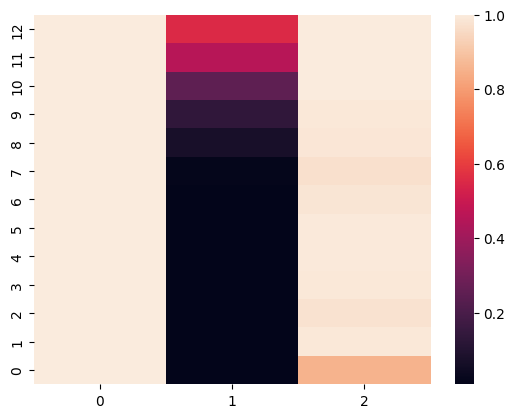

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(avg_true_label_prob)
plt.gca().invert_yaxis()

In [ ]:
# @title Plot Trajectories
import plotly.io as pio
pio.renderers.default = "sphinx_gallery" # Remove this if you are not seeing the plots

from plotly.subplots import make_subplots

def plt_trajectory(trajectory):
  fig = make_subplots(
      # rows=4,
      rows=1,
      cols=1,
      shared_xaxes=True,
      vertical_spacing=0.03,
      # subplot_titles=("Entropy", "Forward KL", "Cross Entropy", "Max Probability"),
      subplot_titles=("Max Probability"),
  )

  # fig.add_trace(
  #     trajectory.entropy().heatmap(
  #         colorbar_y=0.89, colorbar_len=0.25, textfont={'size':10}
  #     ),
  #     row=1, col=1
  # )

  # fig.add_trace(
  #     trajectory.forward_kl().heatmap(
  #         colorbar_y=0.63, colorbar_len=0.25, textfont={'size':10}
  #     ),
  #     row=2, col=1
  # )

  # fig.add_trace(
  #     trajectory.cross_entropy().heatmap(
  #         colorbar_y=0.37, colorbar_len=0.25, textfont={'size':10}
  #     ),
  #     row=3, col=1
  # )

  fig.add_trace(
      trajectory.max_probability().heatmap(
          colorbar_y=0.11, colorbar_len=0.25, textfont={'size':10}
      ),
      # row=4, col=1
      row=1, col=1
  )

  # fig.update_layout(height=800, width=1000, title_text="Tolkien's Tokens on visualized with the Tuned Lens")
  fig.update_layout(height=400, width=1000, title_text="Tolkien's Tokens on visualized with the Tuned Lens")
  fig.show()

# plt_trajectory(trajectory_1)
# plt_trajectory(trajectory_2)
# plt_trajectory(trajectory_3)
# plt_trajectory(trajectory_4)
# plt_trajectory(trajectory_5)
# plt_trajectory(trajectory_6)

NameError: name 'trajectory_1' is not defined

#Neuron Ablation

In [ ]:
# @title Neuron Ablation

import copy

def ablate_head(module, inp, out):
    # out is a tuple, the first element is the attention output
    out = list(out)  # Convert the tuple to a list to allow modification
    out[0] = out[0].clone()  # Clone the first element (attention output)
    out[0][..., start:end] = 0  # Apply ablation to the cloned tensor
    return tuple(out)  # Convert the list back to a tuple

n_head = model.config.n_head                # 12 for gpt2-small
head_size = model.config.hidden_size // n_head

# layer_i = 7

for h in range(n_head):
  start, end = h * head_size, (h + 1) * head_size

  # copy the model to model_ablated
  model_ablated = copy.deepcopy(model)

  # print the model at layer 5, head h
  # print(model.transformer.h[7].attn.c_attn.weight)

  # pick the layer you want, e.g. layer 5
  # attn_module = model.transformer.h[7].attn
  # hook_handle = attn_module.register_forward_hook(ablate_head)
  # model.eval()
  # print(model.transformer.h[7].attn.c_attn.weight)
  # break

  # manually set the outputs the neurons of that head to be zero
  weights = model_ablated.transformer.h[layer_i].attn.c_attn.weight
  # Create a new tensor with the same data and requires_grad=False
  # This is a leaf variable, so we can change requires_grad
  new_weights = torch.tensor(weights.data, requires_grad=False, device=weights.device)

  # Apply ablation to the new_weights tensor
  new_weights[:, start:end] = 0

  # Assign the modified weights back to the model
  model_ablated.transformer.h[layer_i].attn.c_attn.weight = torch.nn.Parameter(new_weights)
  # print(h, "th head:")
  # print(model_ablated.transformer.h[layer_i].attn.c_attn.weight)

  trajectory_1_ablated = gen_tra(model_ablated, tokenizer, input_1, targets_1)
  # trajectory_2_ablated = gen_tra(model_ablated, tokenizer, input_2, targets_2)
  # trajectory_3_ablated = gen_tra(model_ablated, tokenizer, input_3, targets_3)
  # trajectory_4_ablated = gen_tra(model_ablated, tokenizer, input_4, targets_4)
  # trajectory_5_ablated = gen_tra(model_ablated, tokenizer, input_5, targets_5)
  # trajectory_6_ablated = gen_tra(model_ablated, tokenizer, input_6, targets_6)

  print(h, "th head:")
  plt_trajectory(trajectory_1_ablated)
  # plt_trajectory(trajectory_2_ablated)
  # plt_trajectory(trajectory_3_ablated)
  # plt_trajectory(trajectory_4_ablated)
  # plt_trajectory(trajectory_5_ablated)
  # plt_trajectory(trajectory_6_ablated)

  # with hook in place, generate or score inputs
  # input_tensor = torch.tensor([input_1], device=device)
  # outputs = model(input_tensor)
  # compare logits / loss / generation quality to the un-ablated baseline

  # text = "Input: [34, 13, 4, 48, 68]\nOutput: [4, 13"
  # inputs = tokenizer(text, return_tensors="pt").to(device)
  # with torch.no_grad():
  #     outputs = model(**inputs)
  # logits_ablation = outputs.logits  # logits after neuron ablation
  # # Step 1: Choose next-token IDs (greedy argmax example)
  # next_token_ids = torch.argmax(logits_ablation[:, -1, :], dim=-1, keepdim=True)

  # # Step 2: Concatenate with input IDs to form full sequence IDs
  # full_token_ids = torch.cat([inputs.input_ids, next_token_ids], dim=-1)

  # # Step 3: Decode token IDs to text
  # generated_text = tokenizer.decode(full_token_ids[0], skip_special_tokens=True)
  # print(generated_text)

  # remove the hook

  # hook_handle.remove()

<ipython-input-23-631cac9e1caf>:37: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



0 th head:


1 th head:


<ipython-input-23-631cac9e1caf>:37: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



2 th head:


3 th head:


4 th head:


5 th head:


6 th head:


7 th head:


8 th head:


9 th head:


10 th head:


11 th head:


In [ ]:
# @title Neuron Ablation

import copy

def ablate_head(module, inp, out):
    # out is a tuple, the first element is the attention output
    out = list(out)  # Convert the tuple to a list to allow modification
    out[0] = out[0].clone()  # Clone the first element (attention output)
    out[0][..., start:end] = 0  # Apply ablation to the cloned tensor
    return tuple(out)  # Convert the list back to a tuple

n_head = model.config.n_head                # 12 for gpt2-small
head_size = model.config.hidden_size // n_head

layer_i = 7

def calculate_ablated_prob(layer):
  ablated_prob_dict = {}

  for h in range(n_head):
    start, end = h * head_size, (h + 1) * head_size

    # copy the model to model_ablated
    model_ablated = copy.deepcopy(model)
    # manually set the outputs the neurons of that head to be zero
    weights = model_ablated.transformer.h[layer].attn.c_attn.weight
    # Create a new tensor with the same data and requires_grad=False
    # This is a leaf variable, so we can change requires_grad
    new_weights = torch.tensor(weights.data, requires_grad=False, device=weights.device)

    # Apply ablation to the new_weights tensor
    new_weights[:, start:end] = 0

    # Assign the modified weights back to the model
    model_ablated.transformer.h[layer].attn.c_attn.weight = torch.nn.Parameter(new_weights)
    # print(h, "th head:")
    # print(model_ablated.transformer.h[layer].attn.c_attn.weight)

    avg_true_label_prob_ablated = calculate_label_probs(model_ablated, test_samples)
    ablated_prob_dict[h] = avg_true_label_prob_ablated

  return ablated_prob_dict


In [ ]:
# def plot_heatmap(data_dict):
#   fig, axes = plt.subplots(4, 3, figsize=(15, 9))
#   for i in range(n_head):
#     plt_i, plt_j = i // 3, i % 3
#     ax = axes[plt_i, plt_j]
#     sns.heatmap(data_dict[i], ax=ax)
#     ax.invert_yaxis()

In [ ]:
print(layer_to_ablated_probs)

NameError: name 'layer_to_ablated_probs' is not defined

In [ ]:
layer_to_ablated_probs = {}
for i in range(12):
  print("Calculating at the", i, "th layer:")
  ablated_prob_dict = calculate_ablated_prob(i)
  layer_to_ablated_probs[i] = ablated_prob_dict

Calculating at the 0 th layer:


<ipython-input-16-fcd349b60ef6>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_weights = torch.tensor(weights.data, requires_grad=False, device=weights.device)


Calculating at the 1 th layer:
Calculating at the 2 th layer:
Calculating at the 3 th layer:
Calculating at the 4 th layer:
Calculating at the 5 th layer:
Calculating at the 6 th layer:
Calculating at the 7 th layer:
Calculating at the 8 th layer:
Calculating at the 9 th layer:
Calculating at the 10 th layer:
Calculating at the 11 th layer:


In [ ]:
import json
layer_to_ablated_probs["no ablation"] = avg_true_label_prob
with open("../ablation_results.json", "w") as f:
  json.dump(layer_to_ablated_probs, f, indent=4)

In [ ]:
print(layer_to_ablated_probs.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'no ablation'])


In [ ]:
with open("../ablation_results.json", "r") as f:
  data = json.load(f)

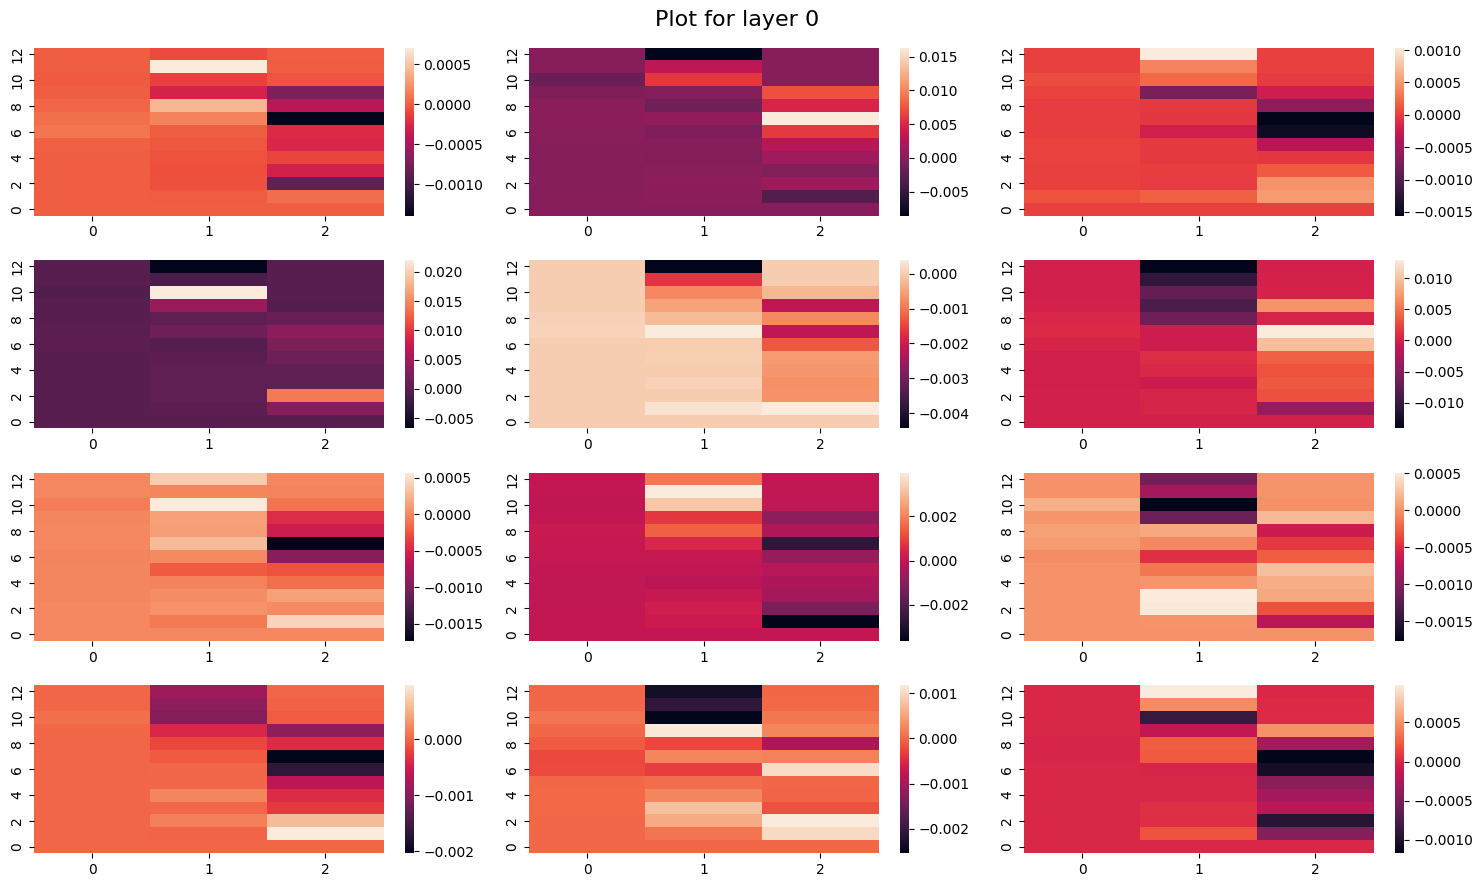

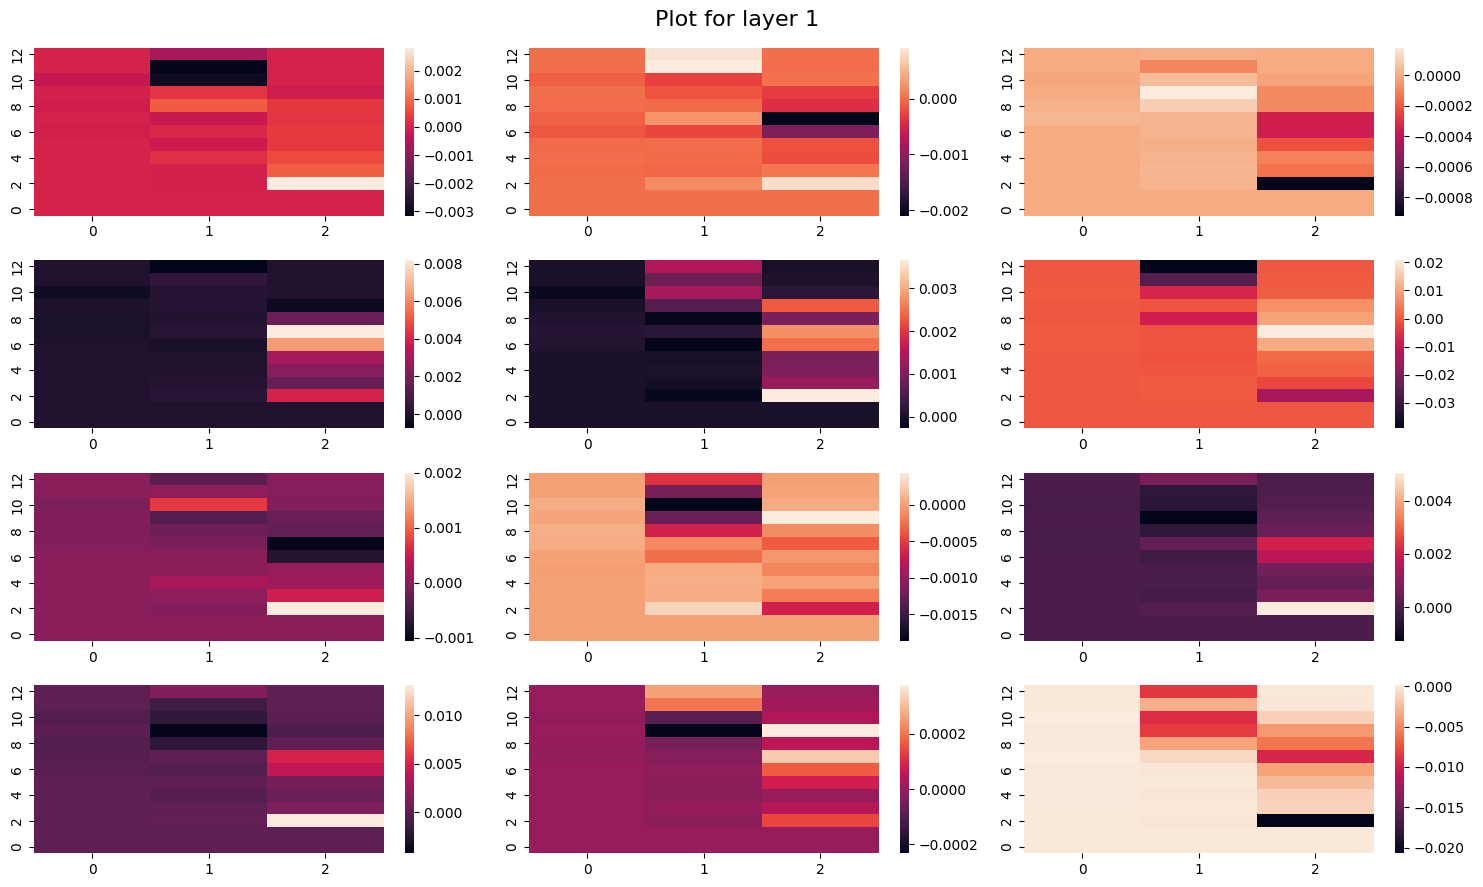

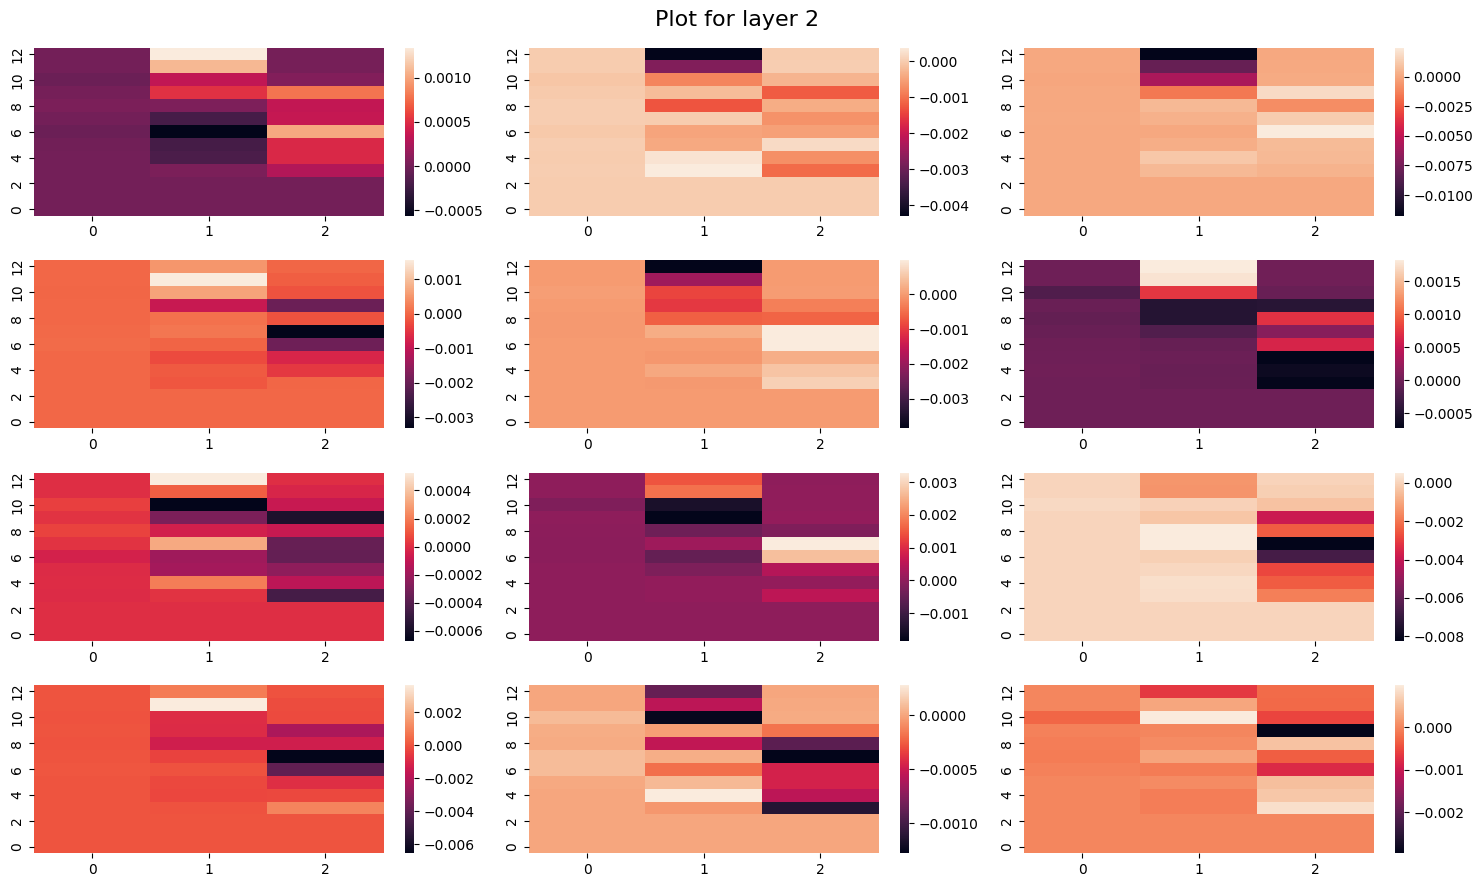

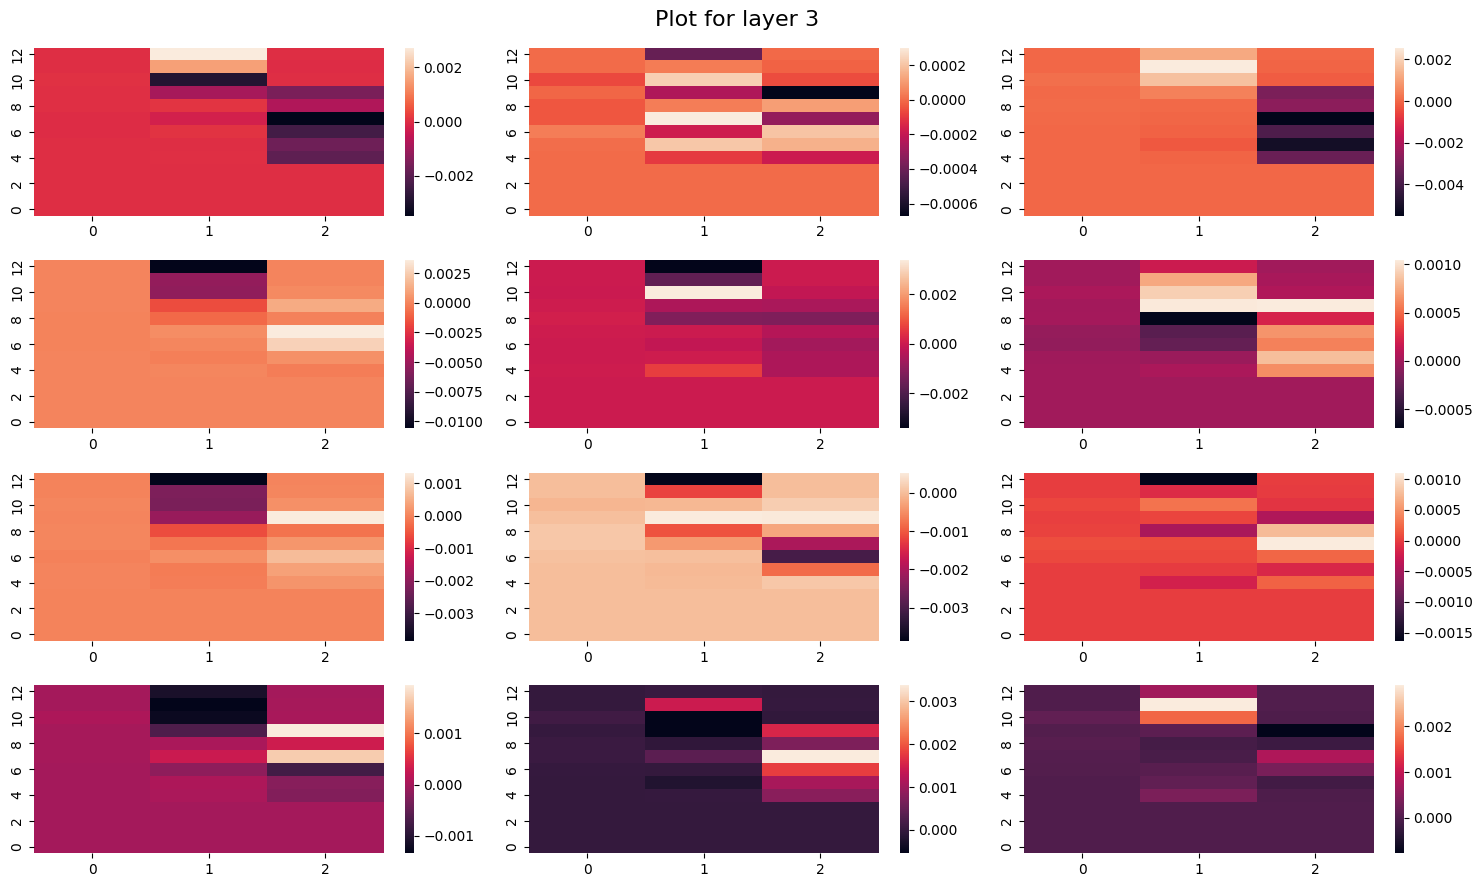

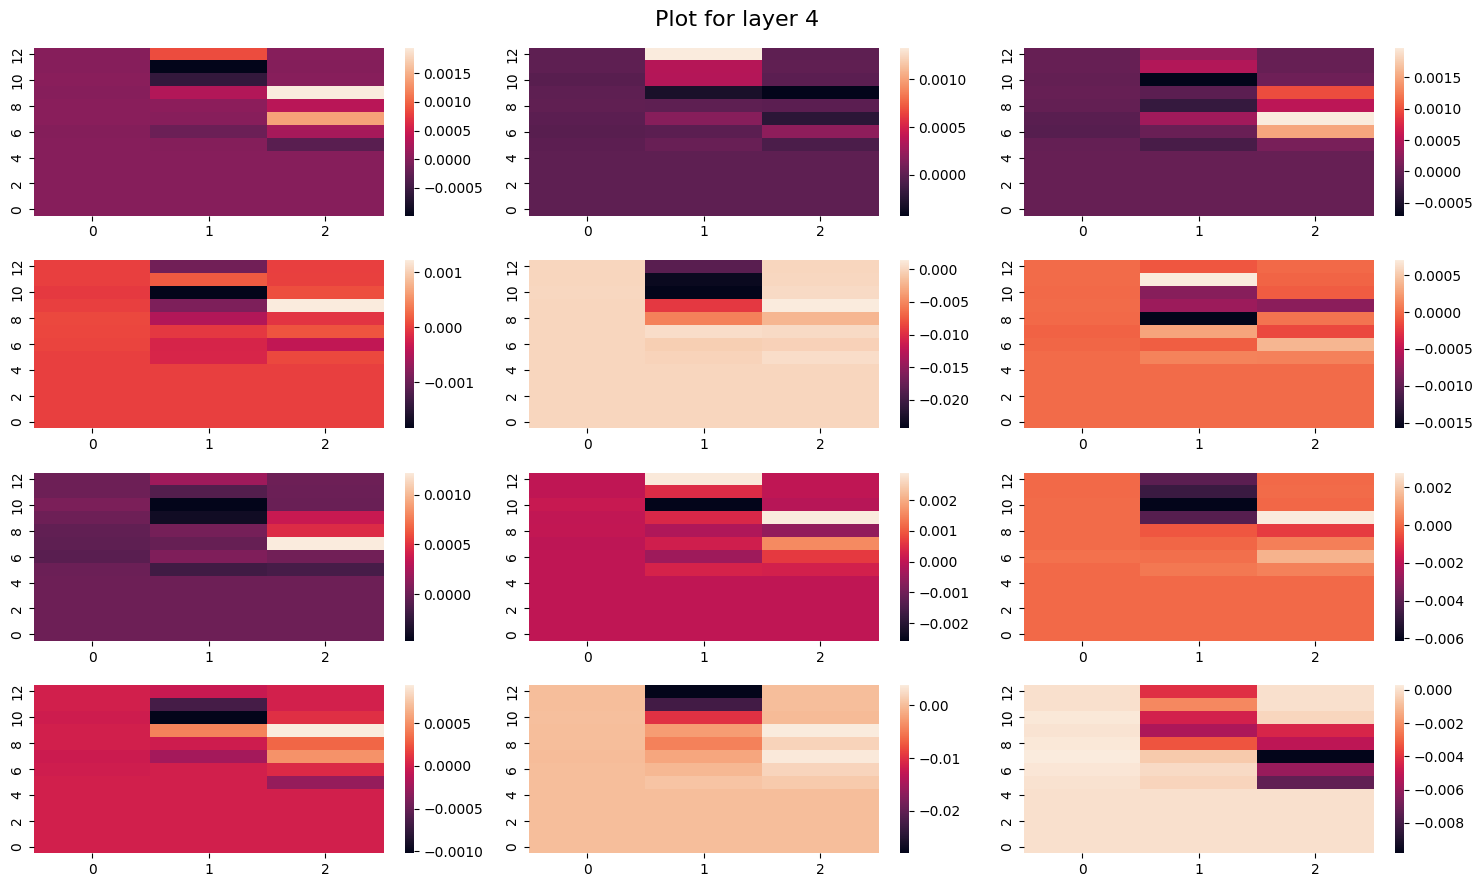

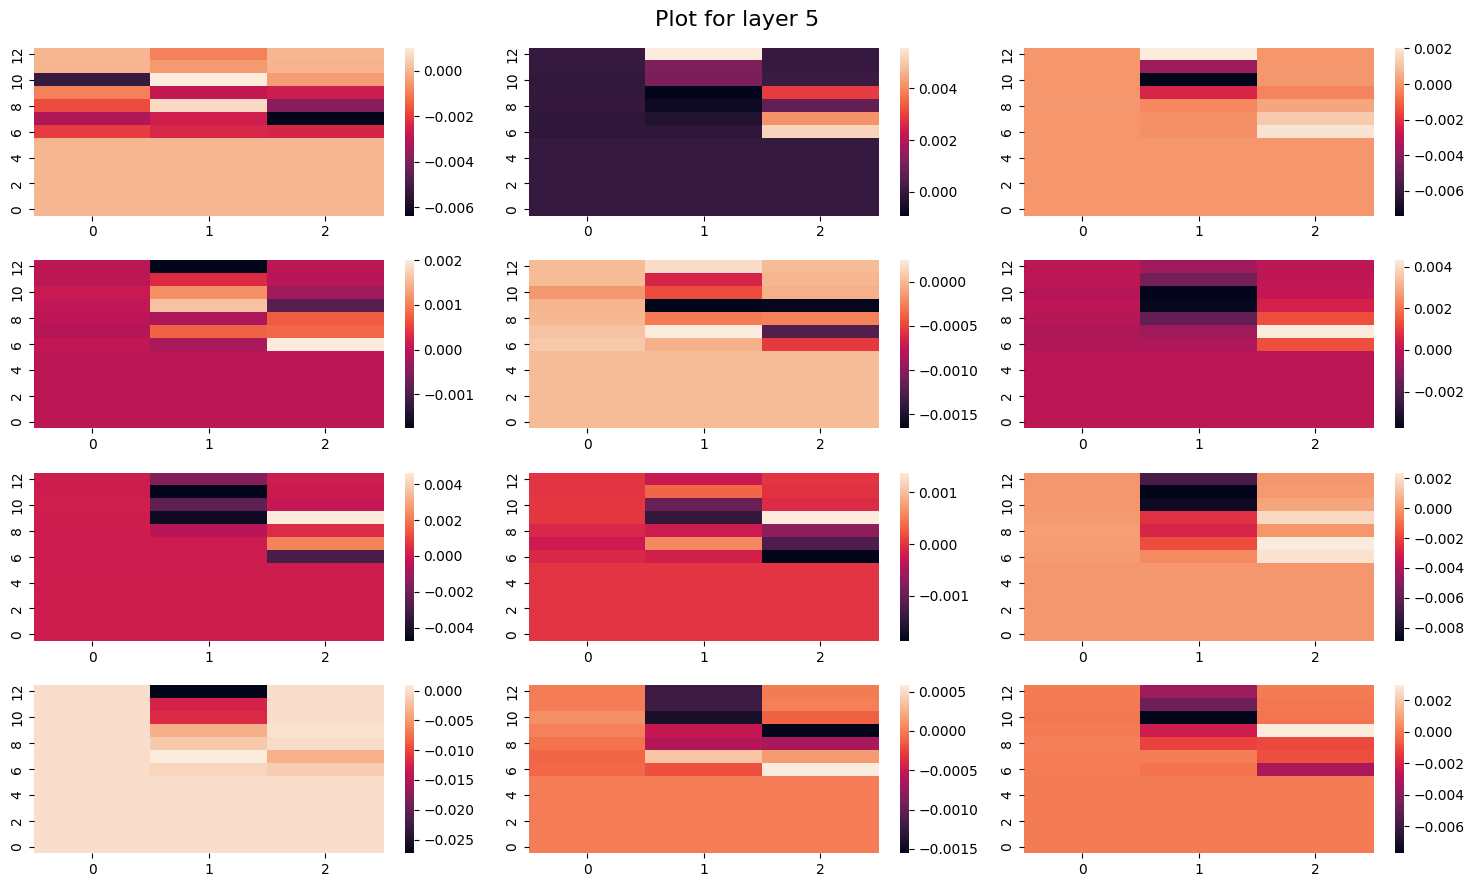

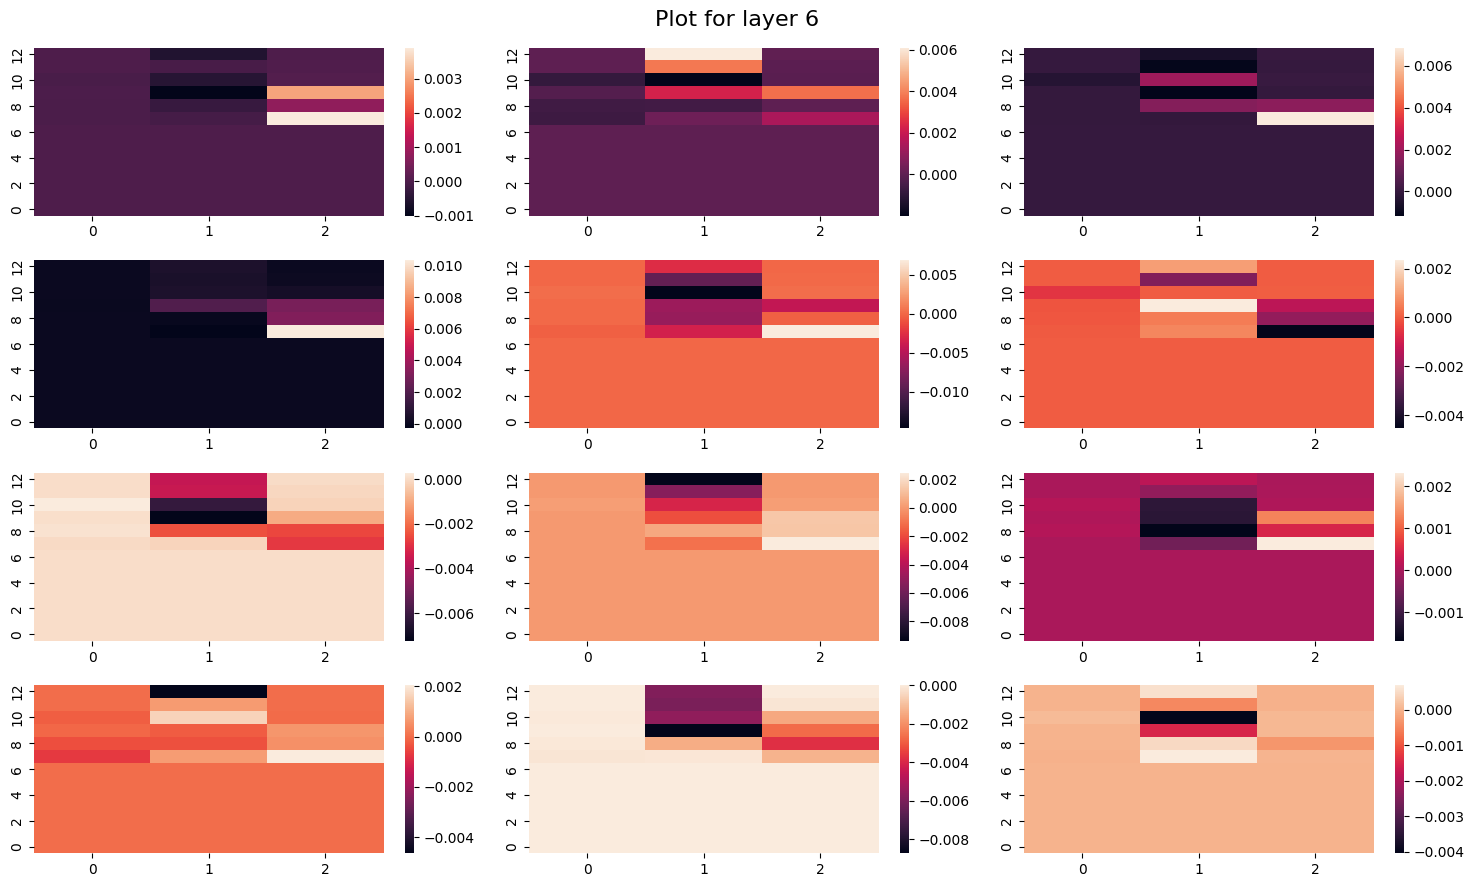

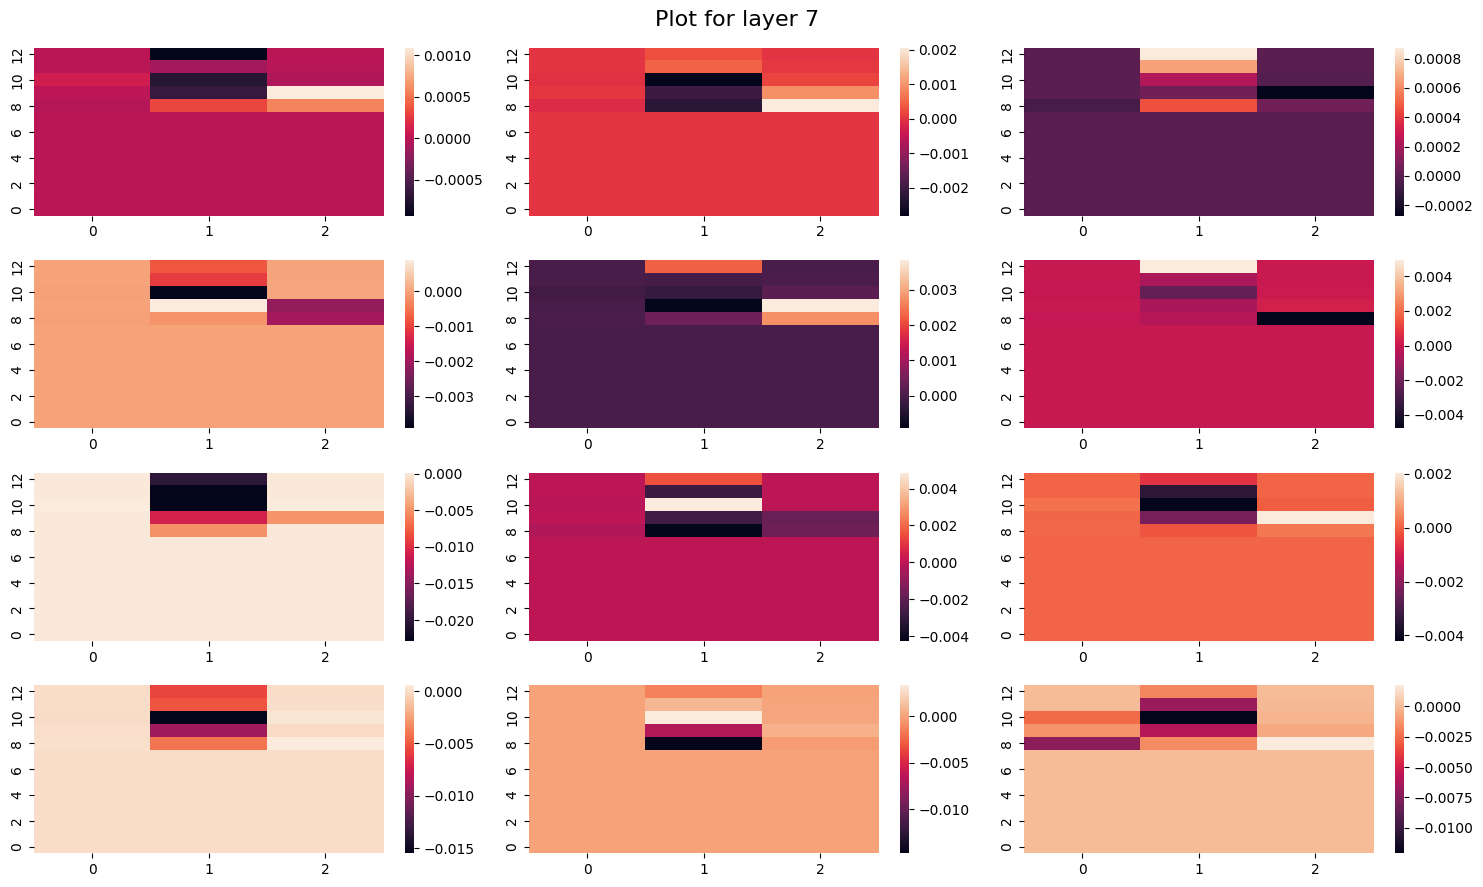

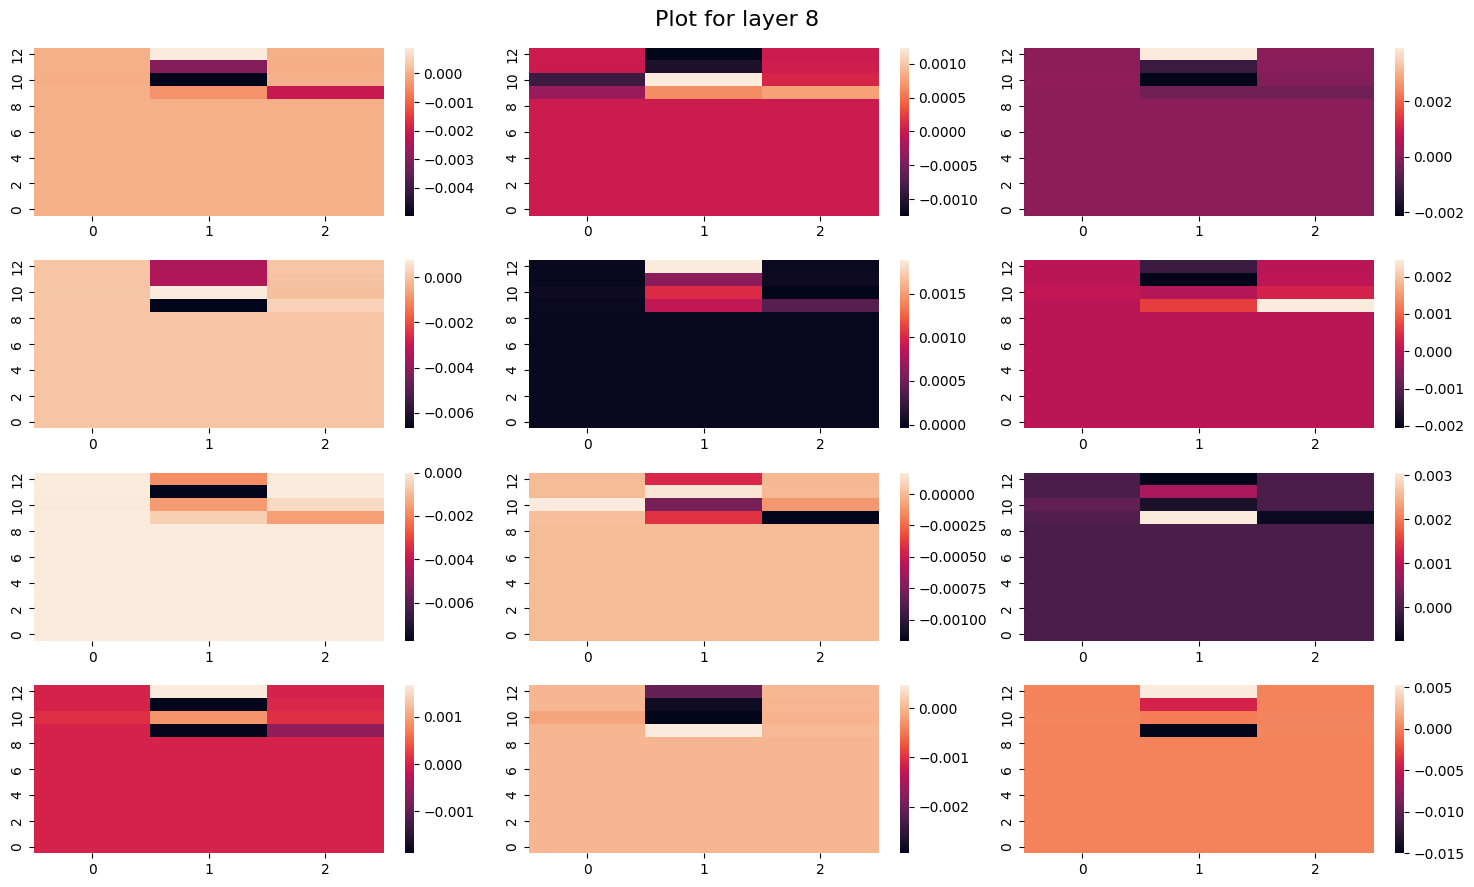

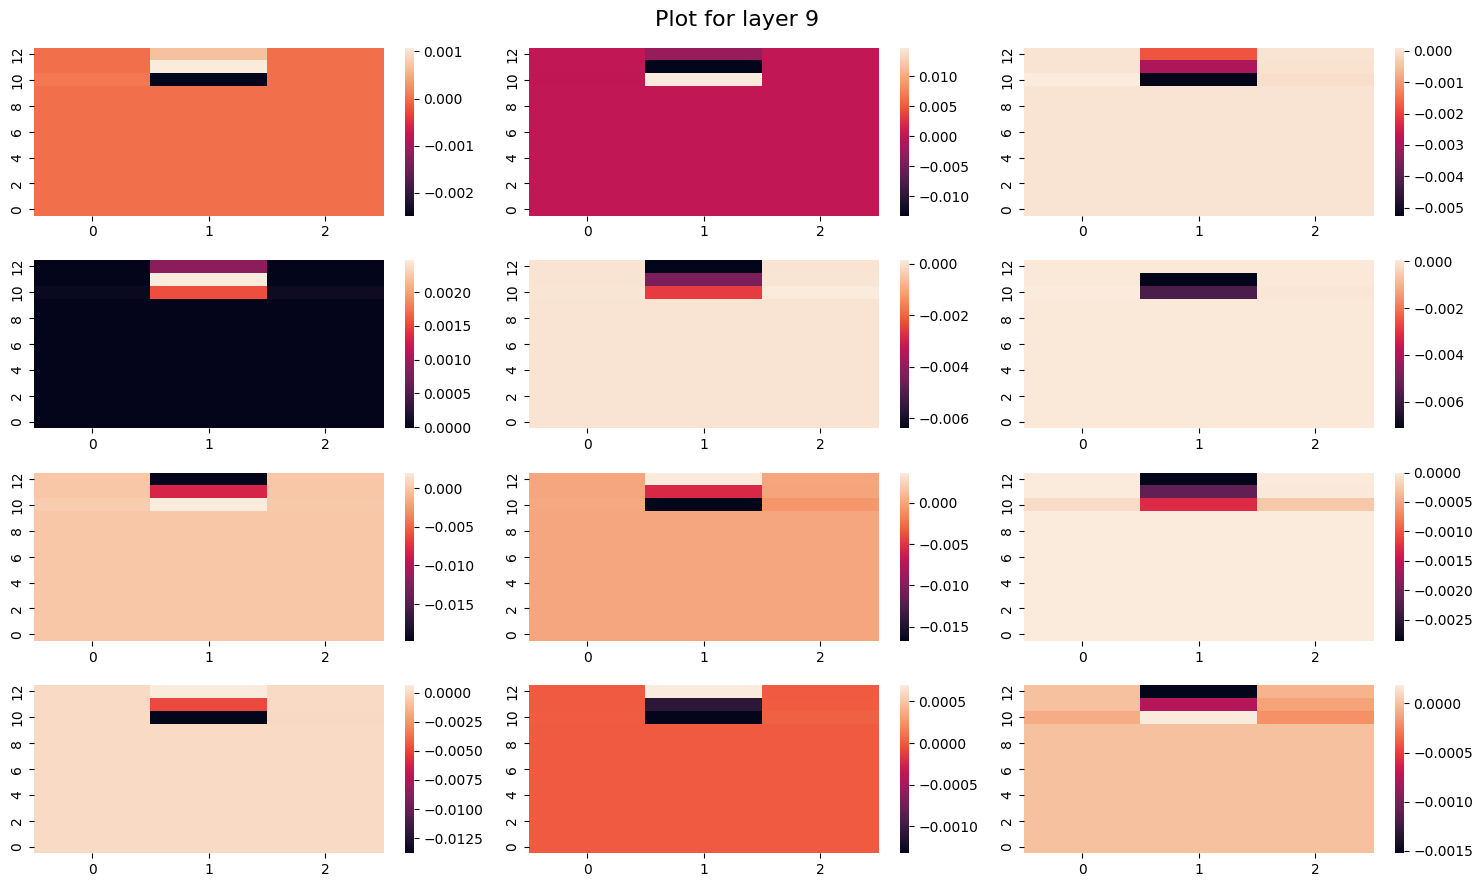

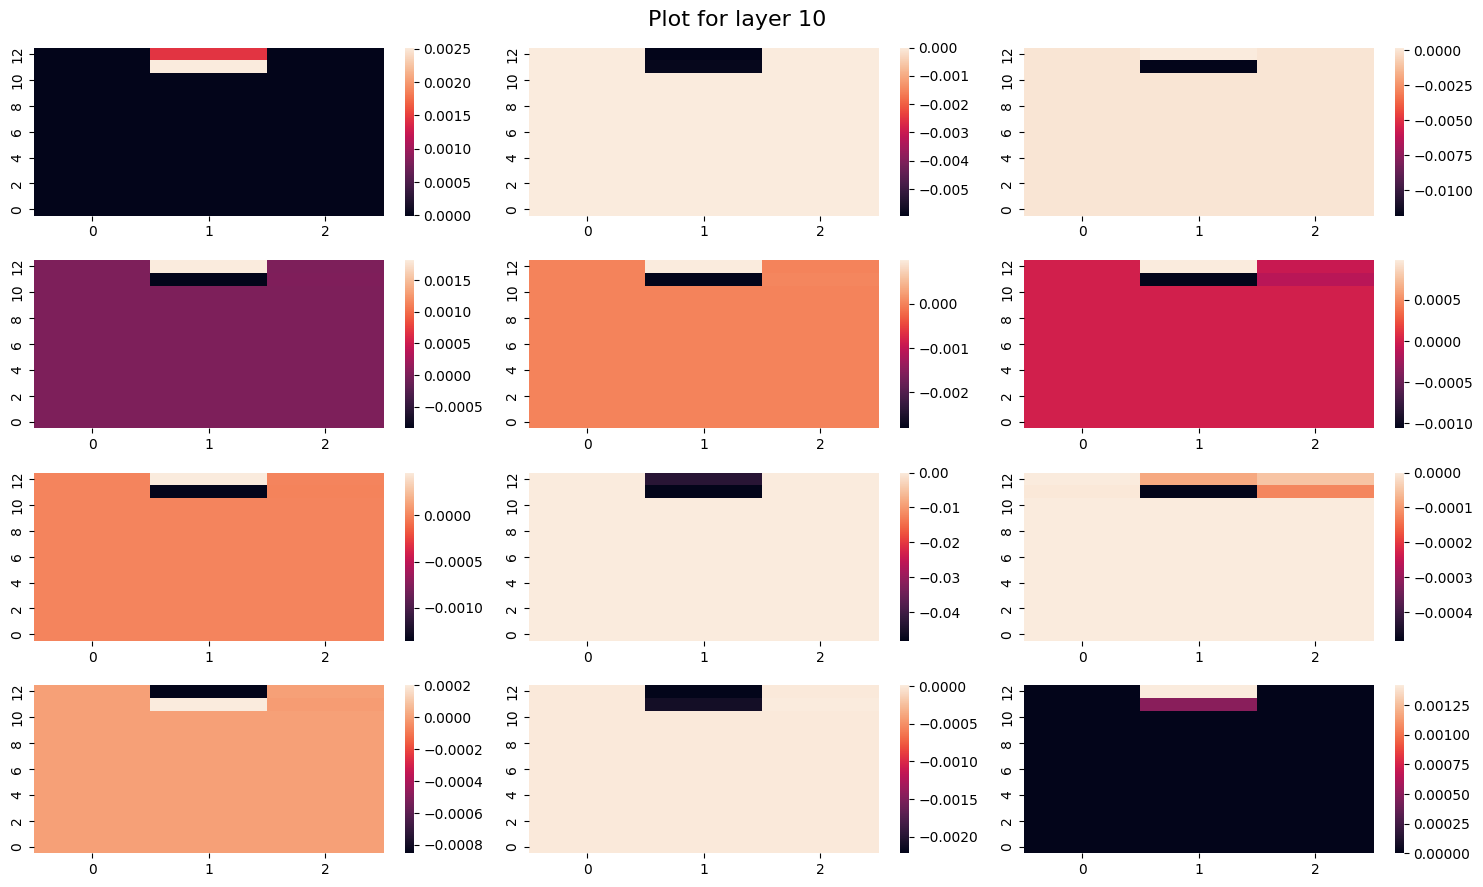

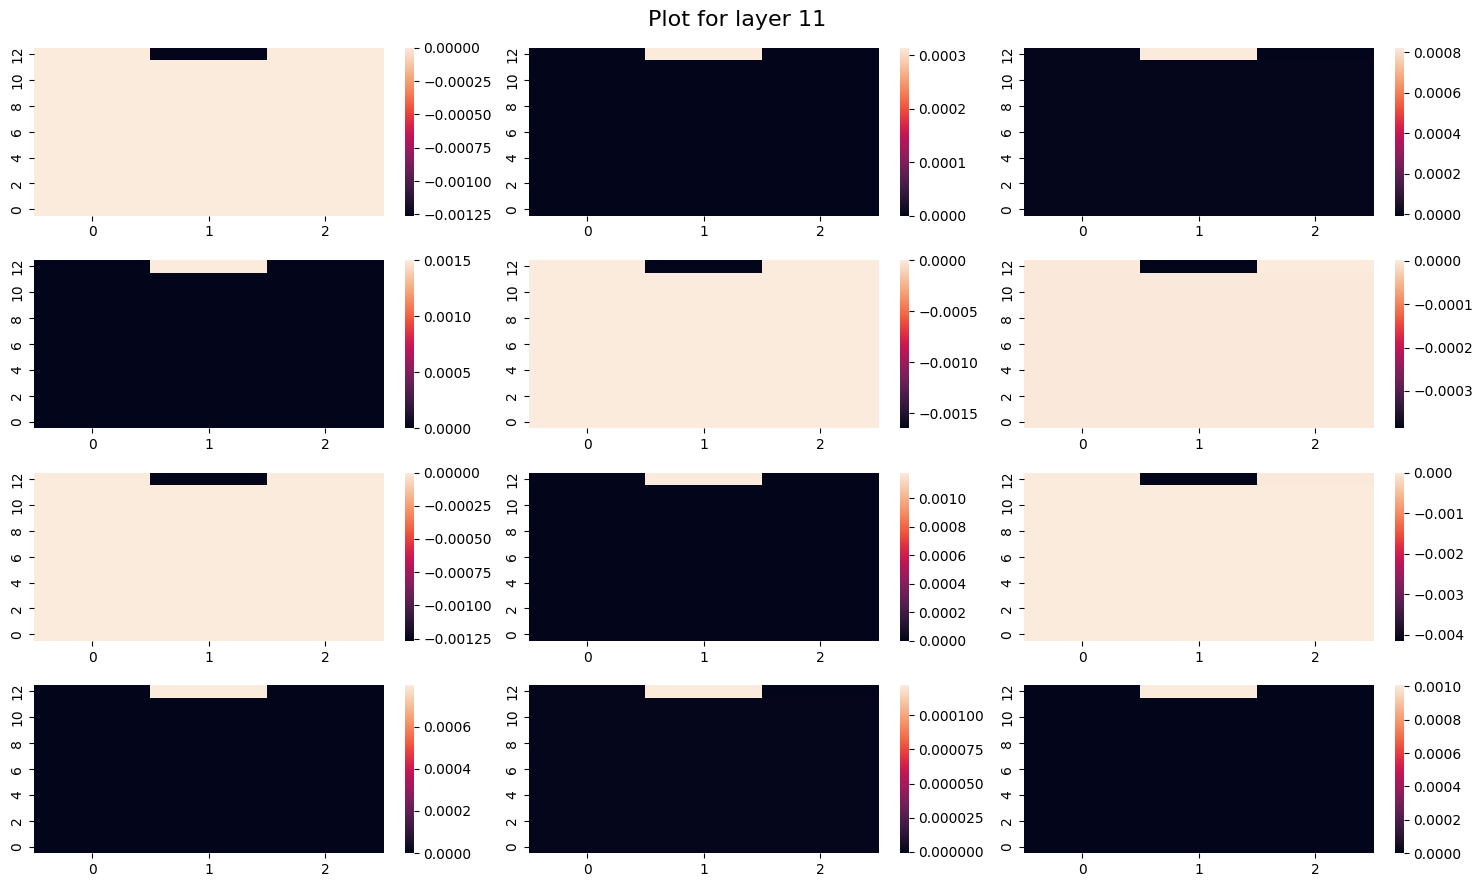

In [ ]:
for i in range(12): # not 13
  fig, axes = plt.subplots(4, 3, figsize=(15, 9))
  fig.suptitle(f"Plot for layer {i}", fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 1])
  for j in range(n_head):
    diff = np.array(layer_to_ablated_probs[i][j]) - np.array(layer_to_ablated_probs["no ablation"])
    plt_i, plt_j = j // 3, j % 3
    ax = axes[plt_i, plt_j]
    sns.heatmap(diff, ax=ax)
    ax.invert_yaxis()

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


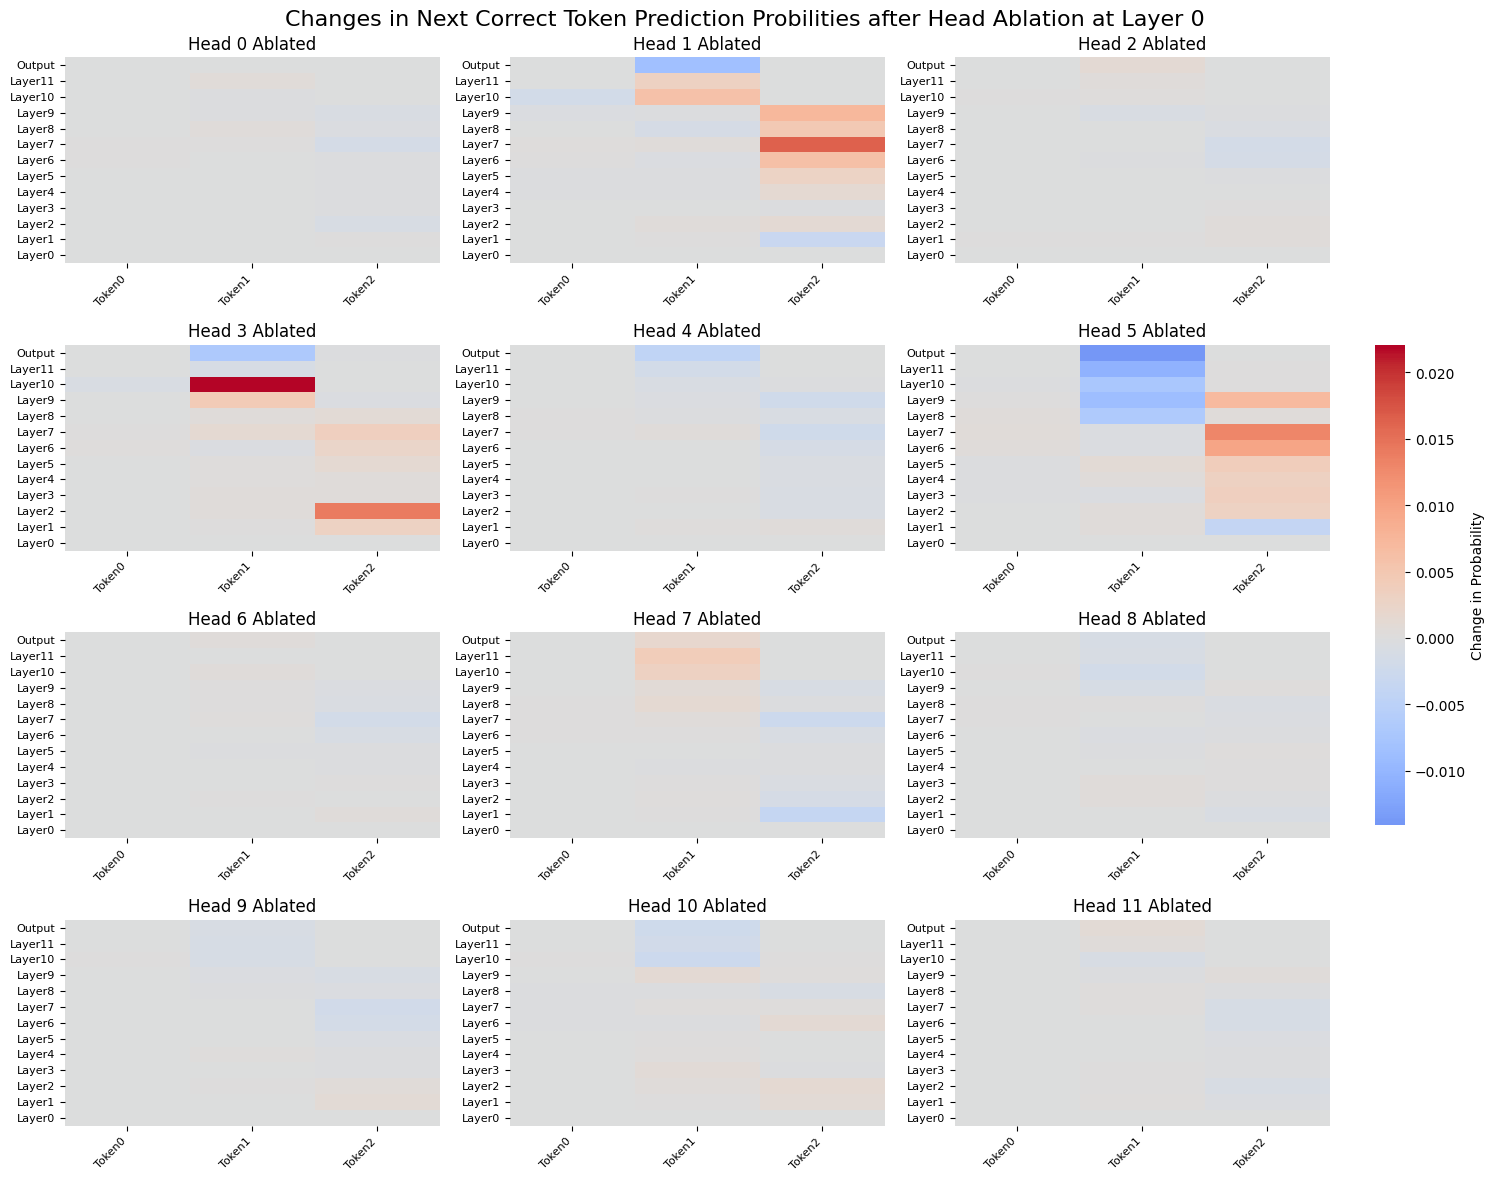

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


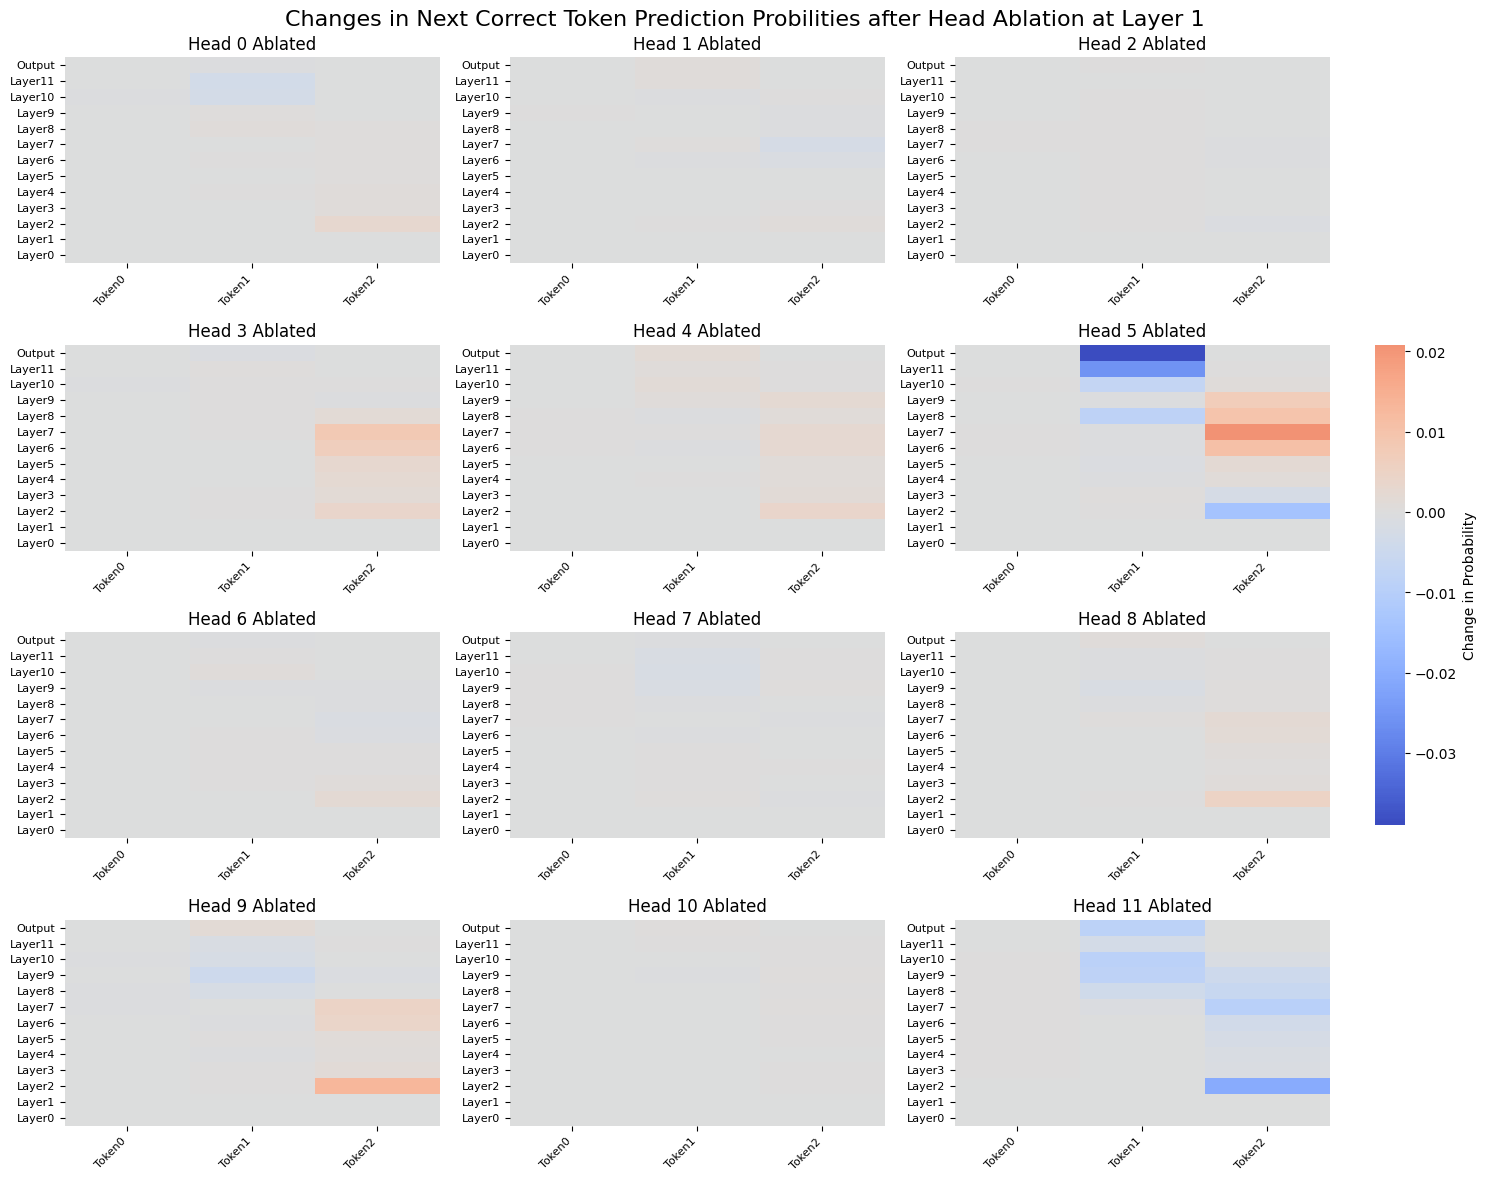

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


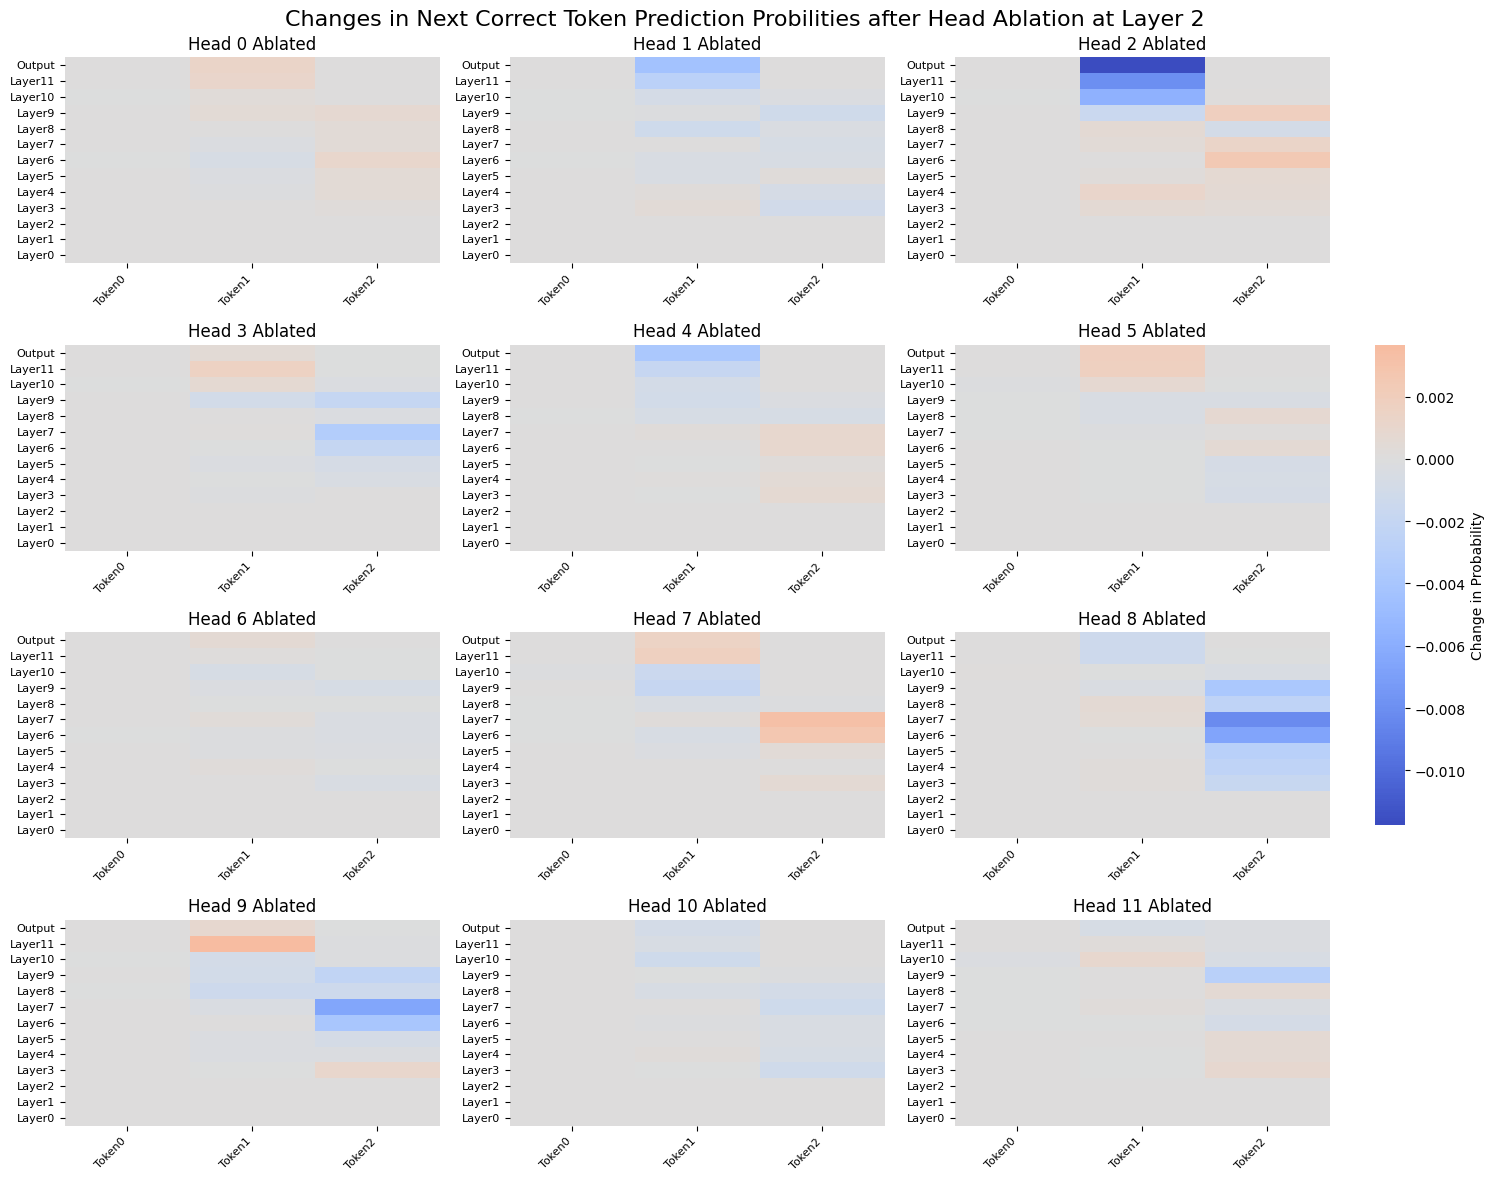

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


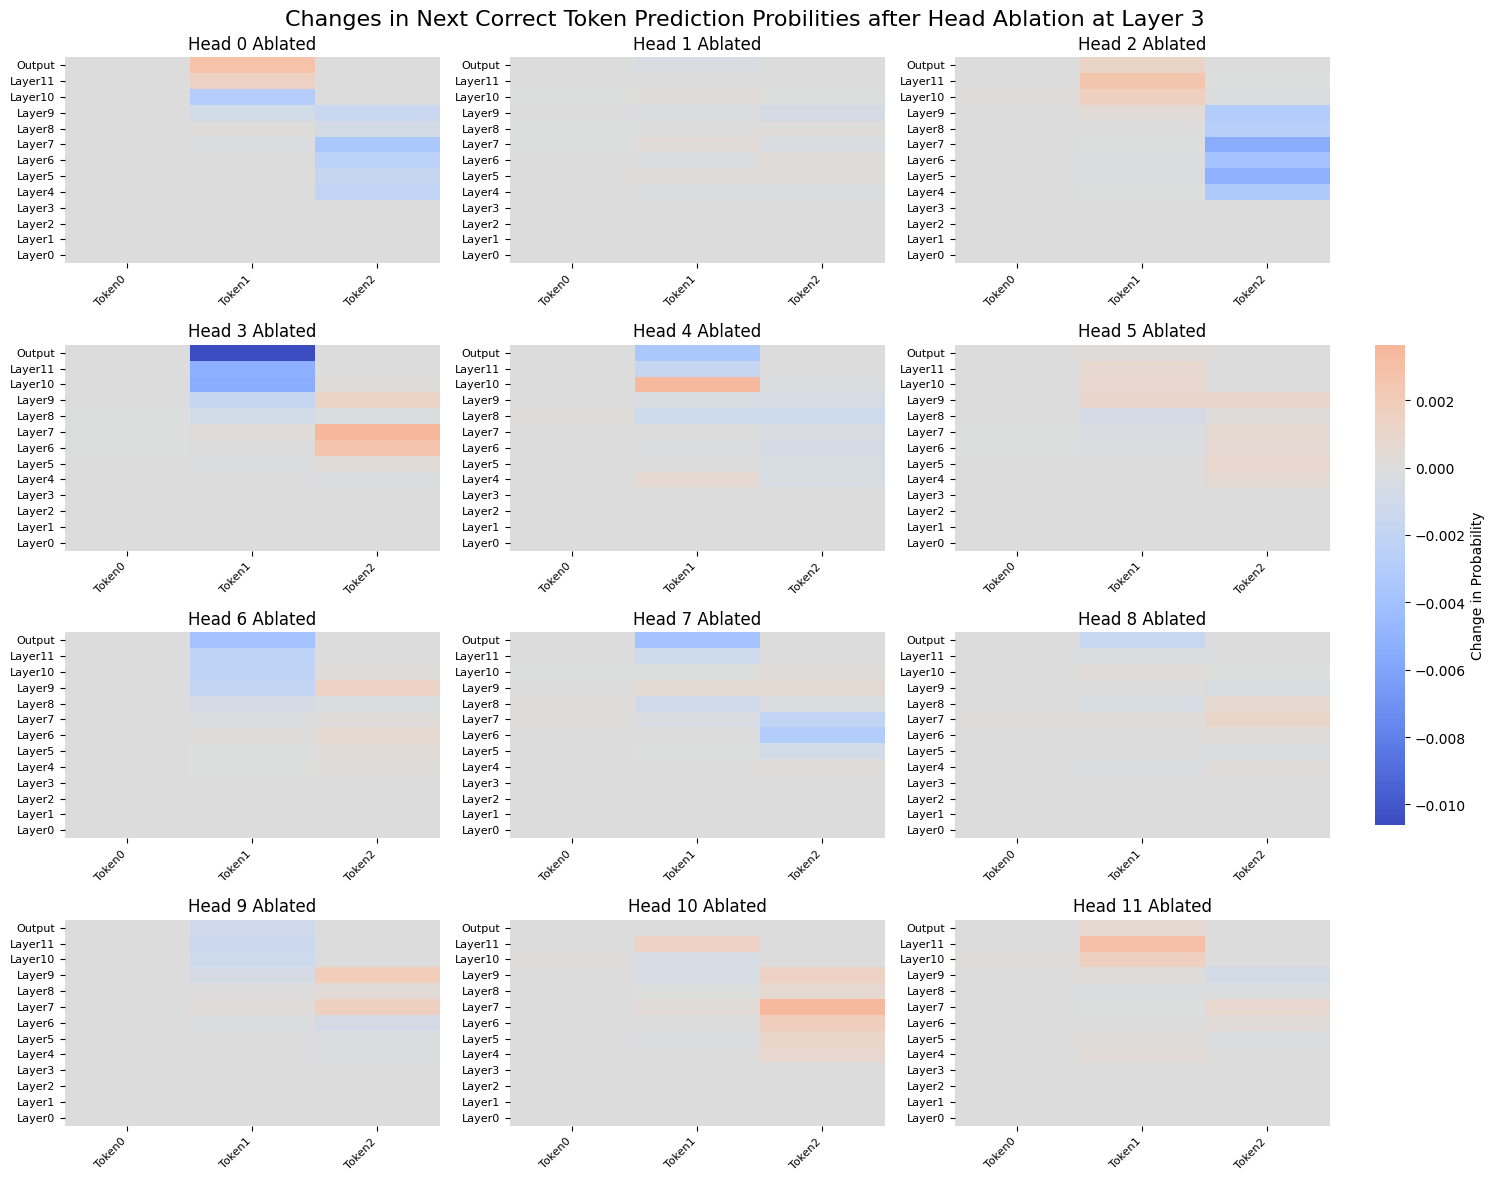

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


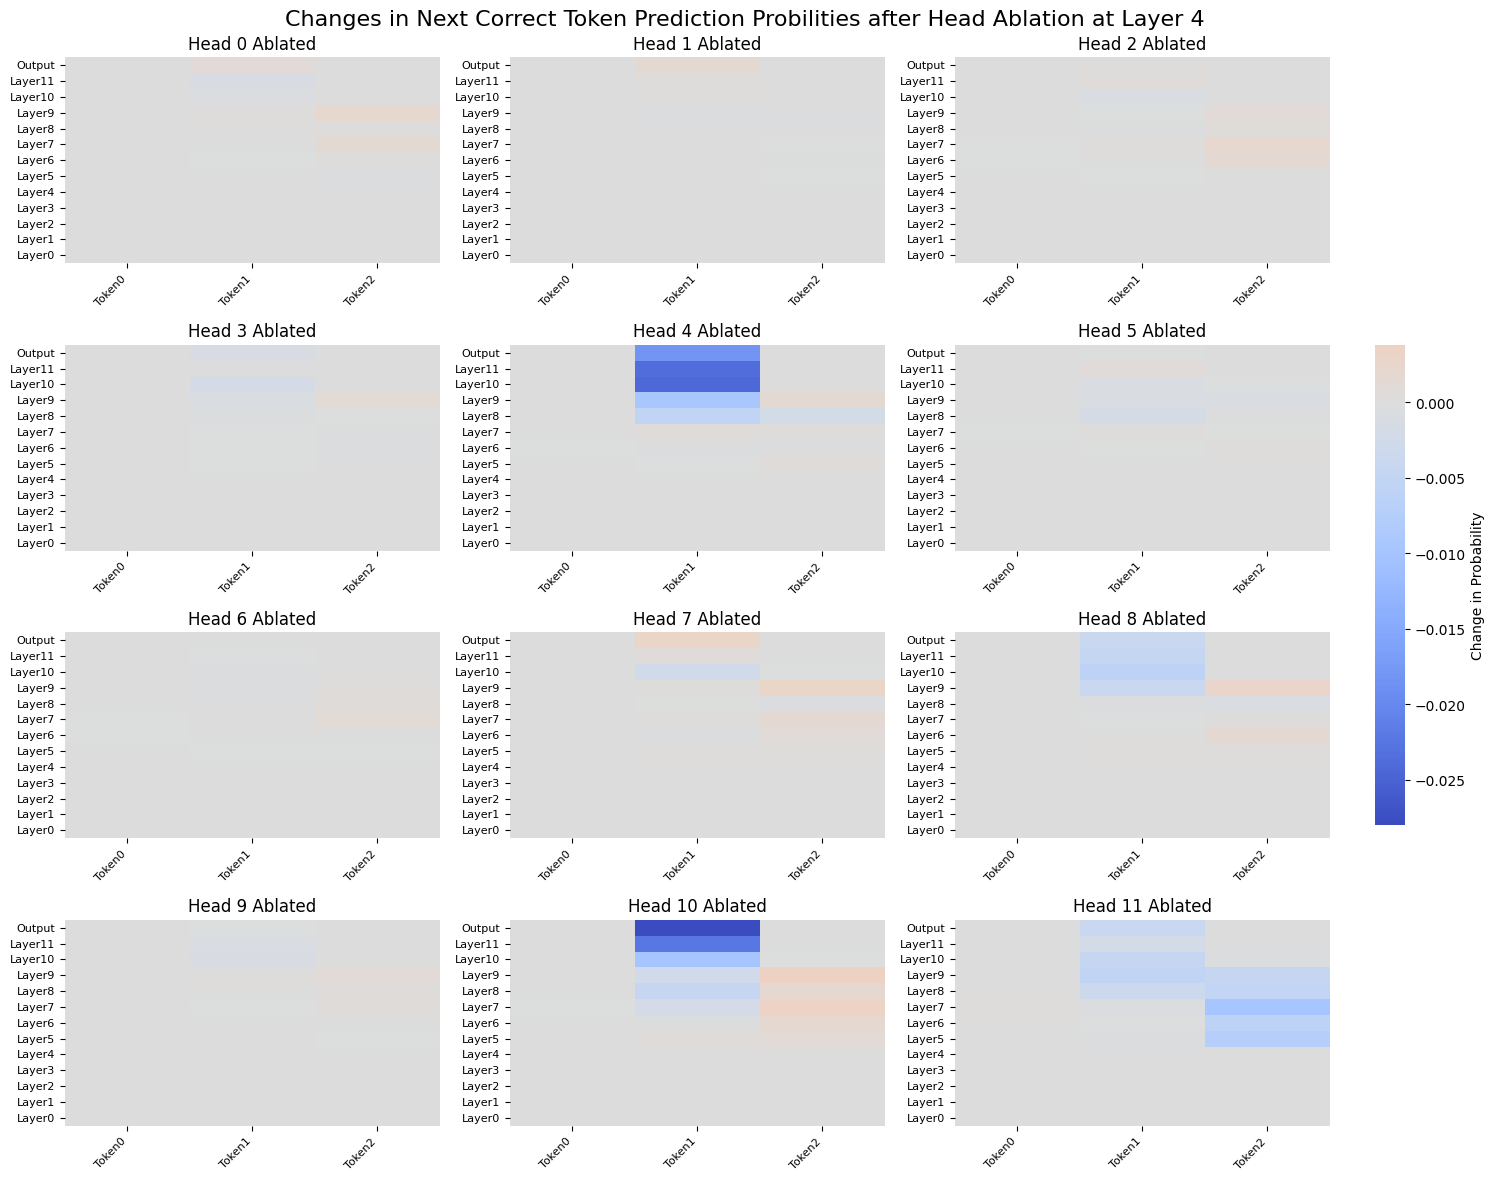

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


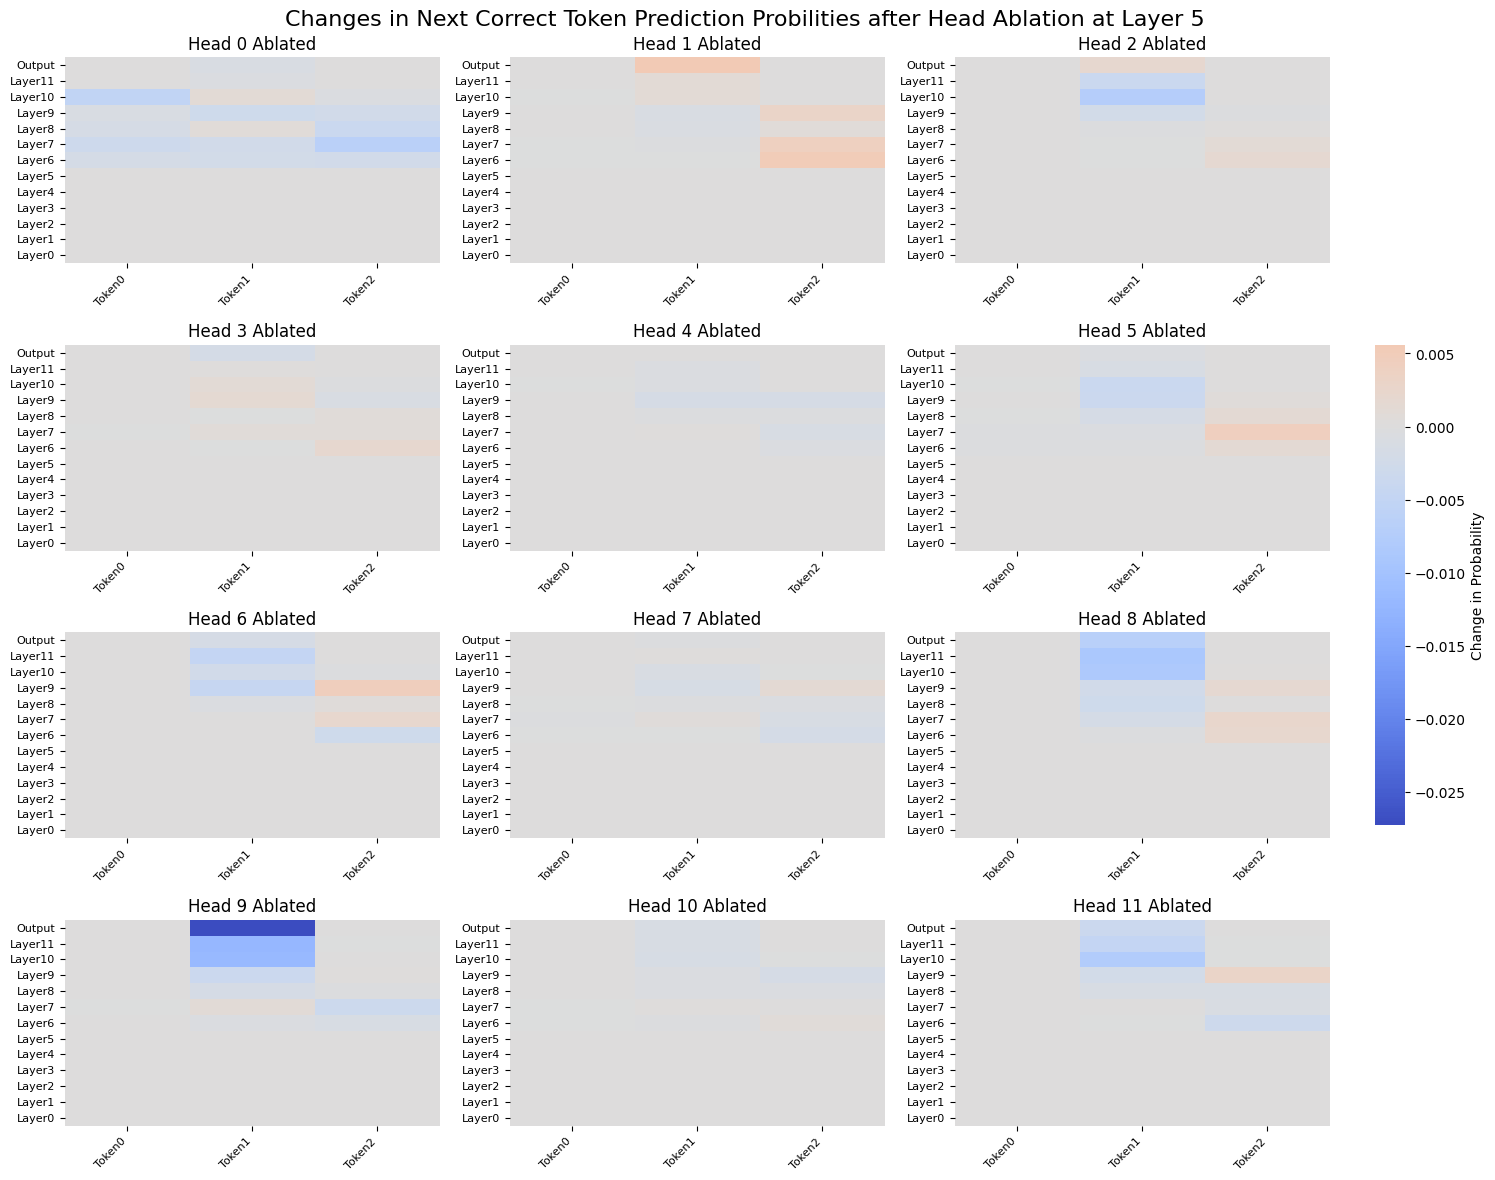

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


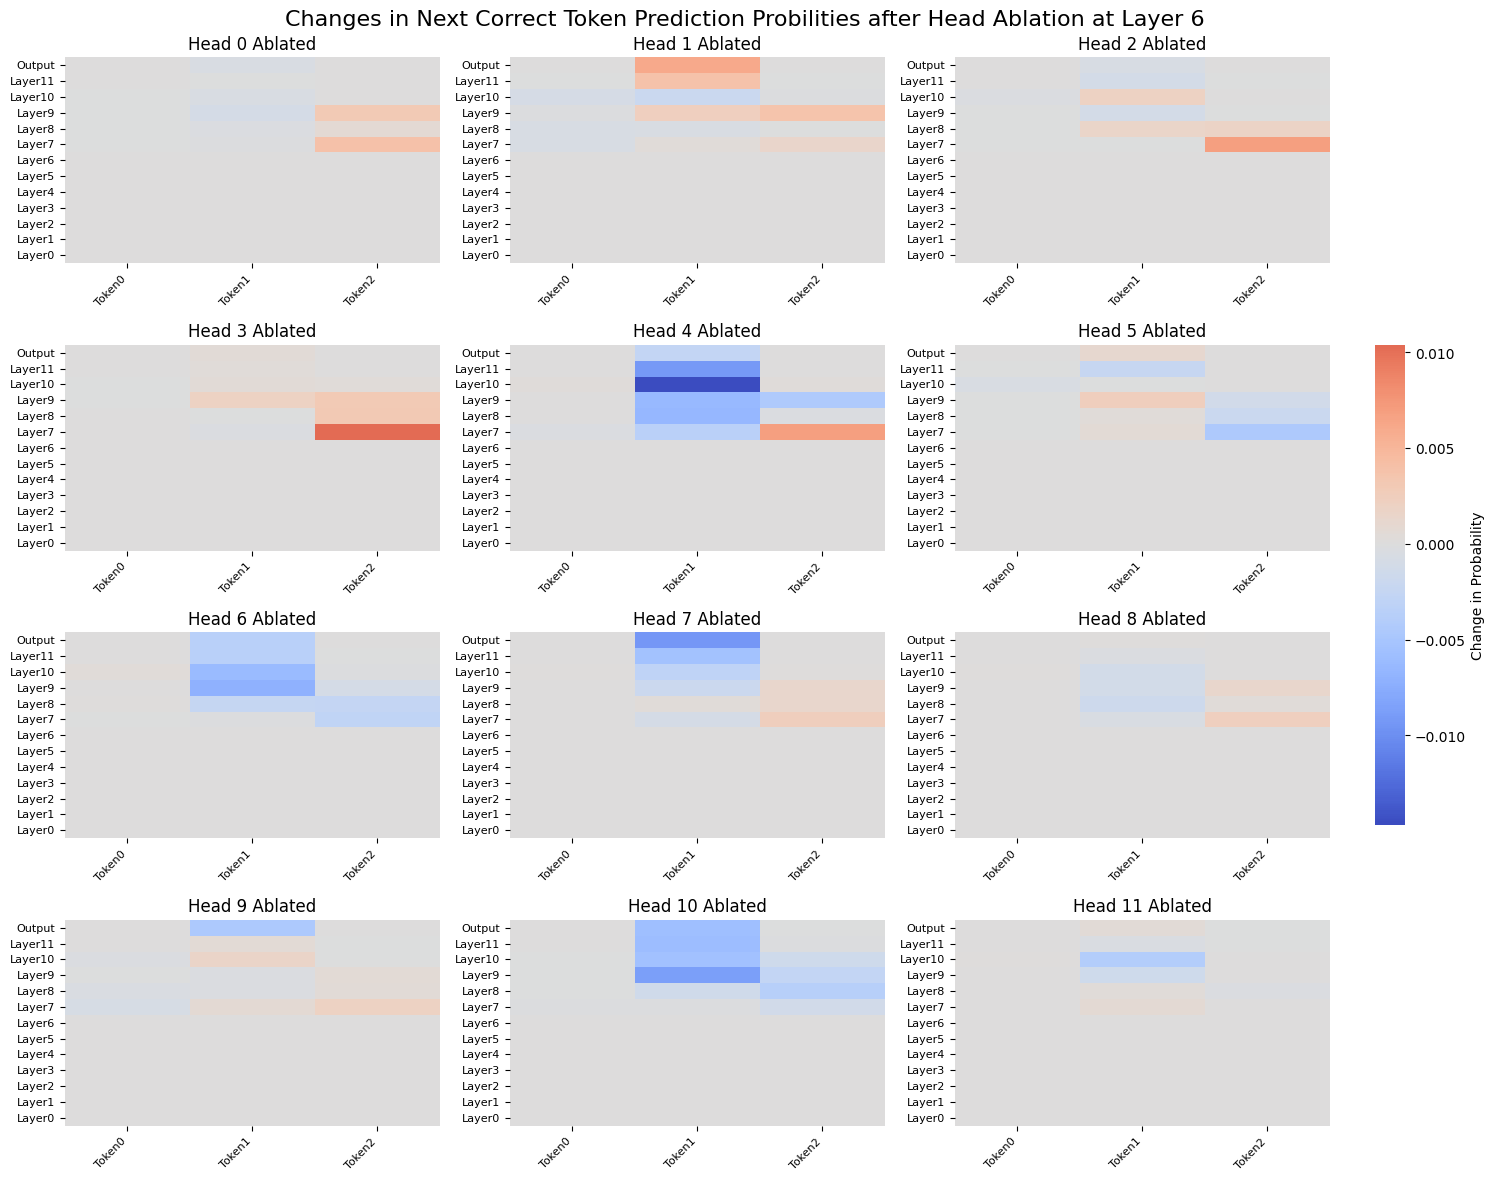

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


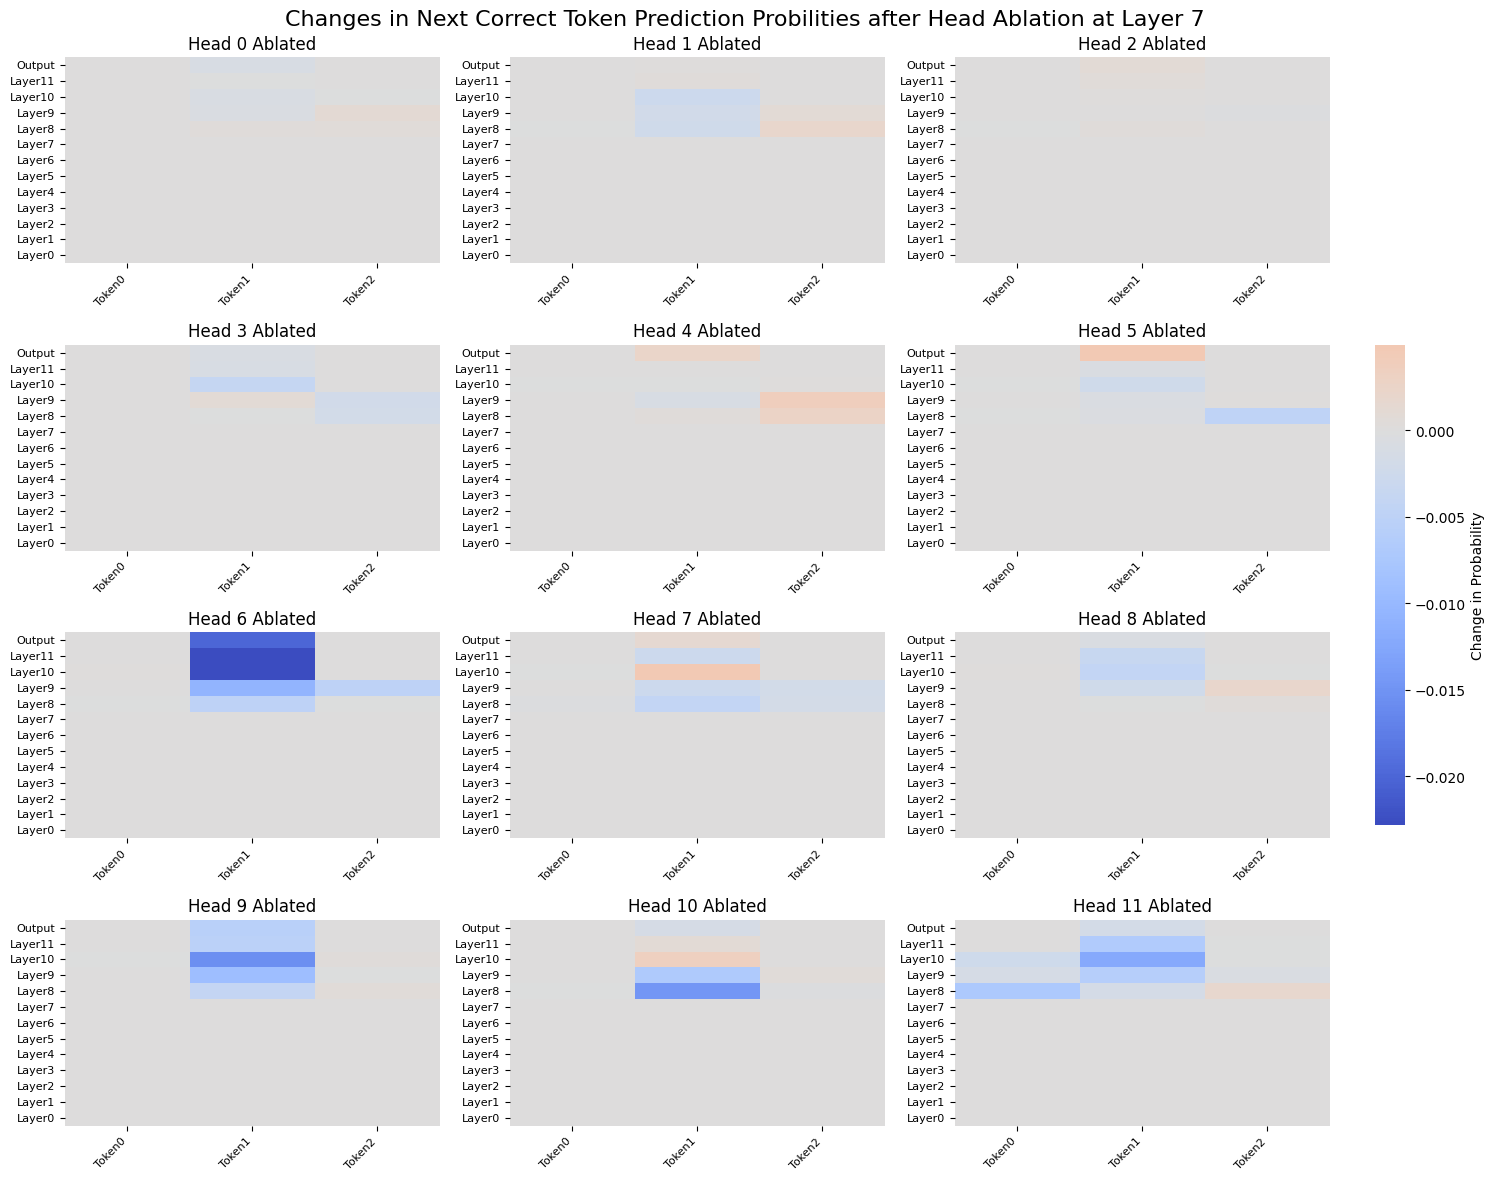

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


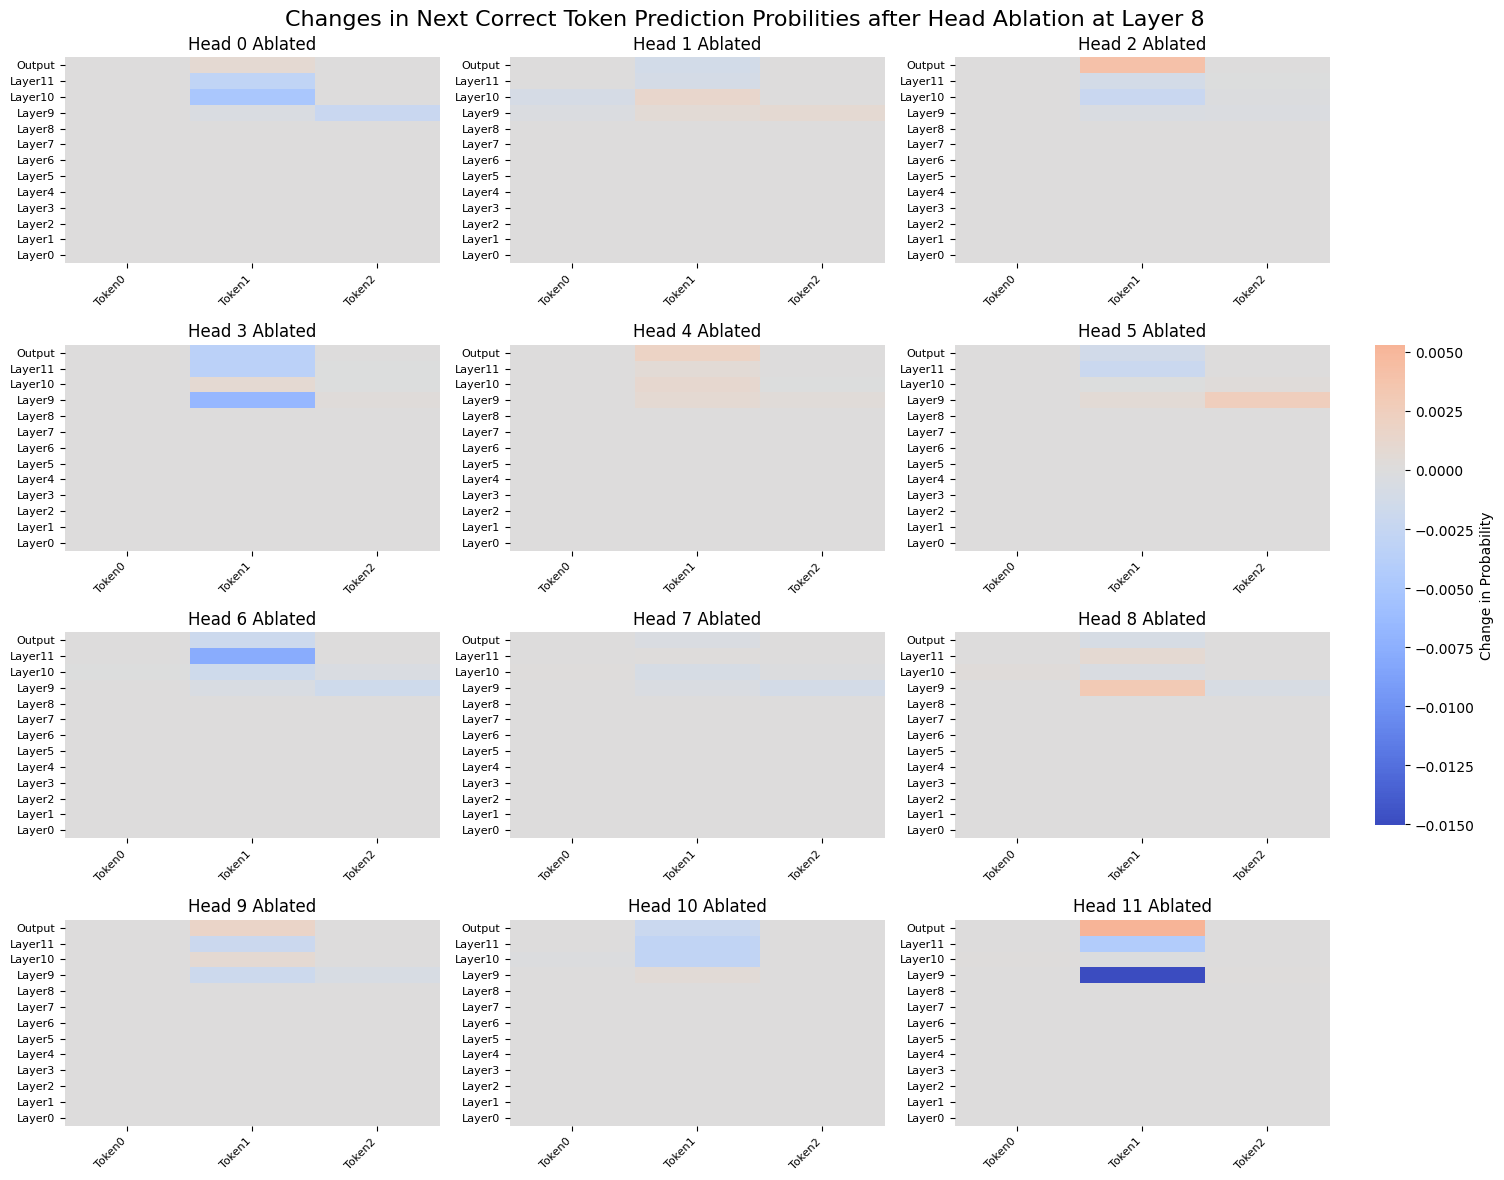

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


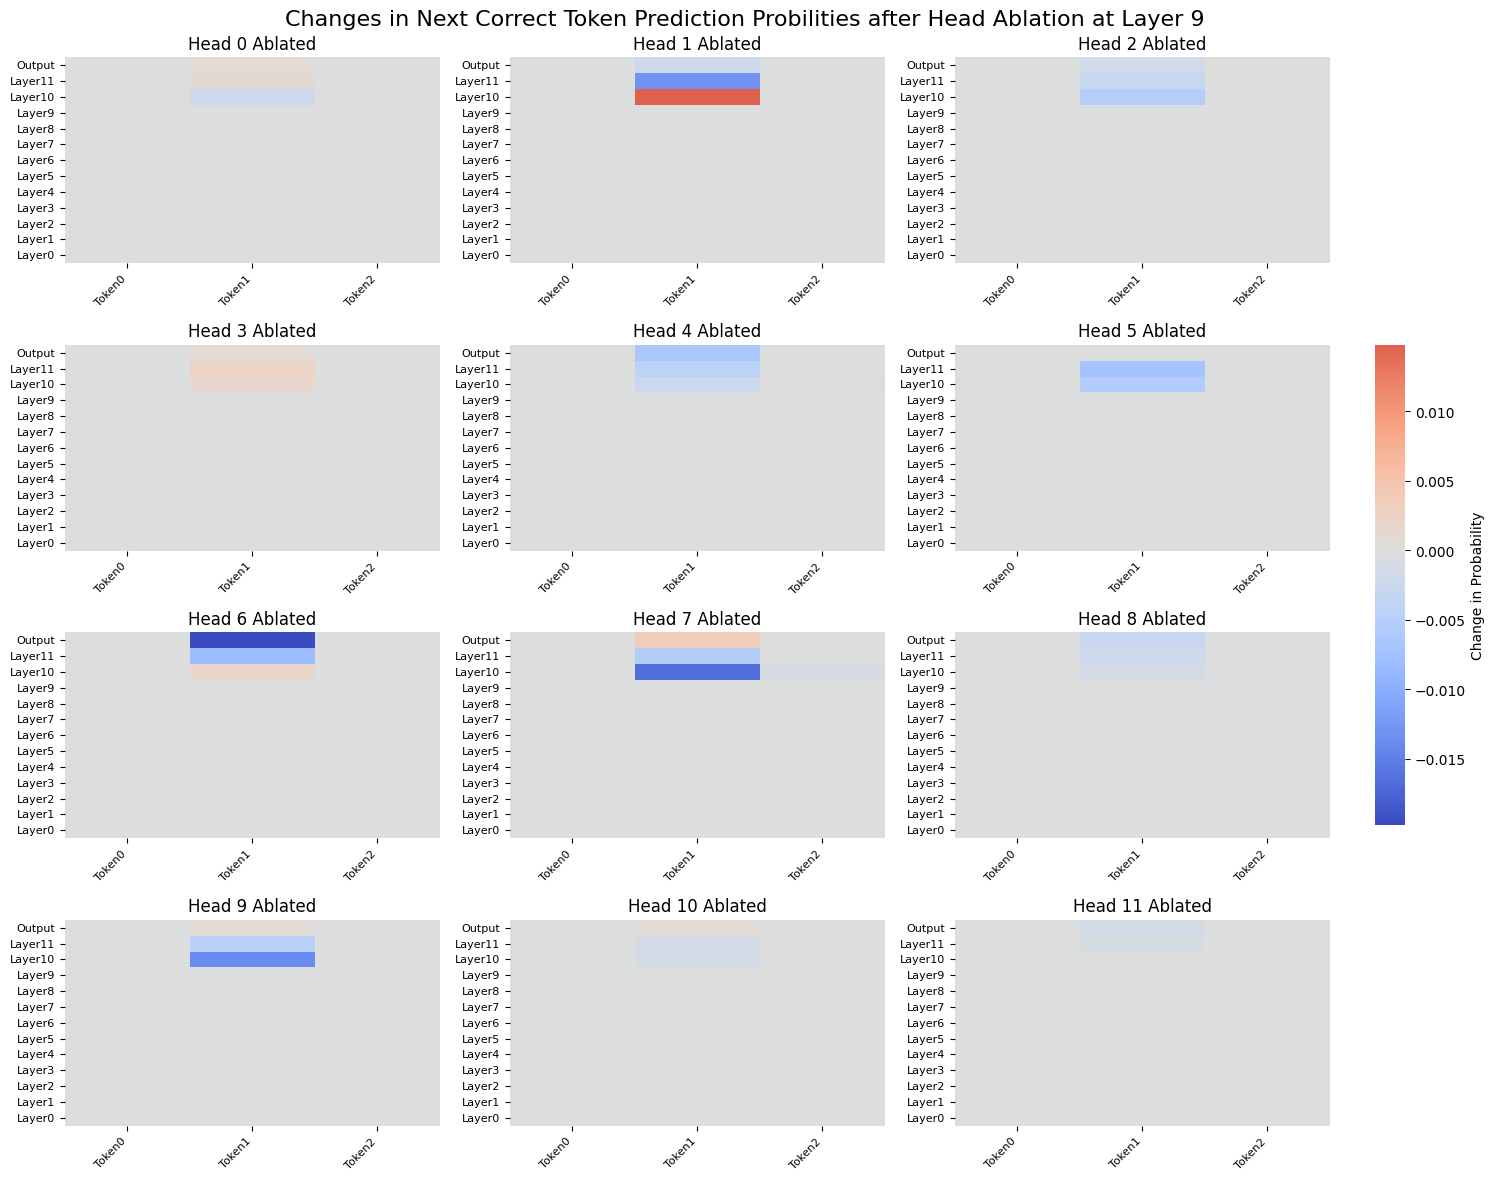

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


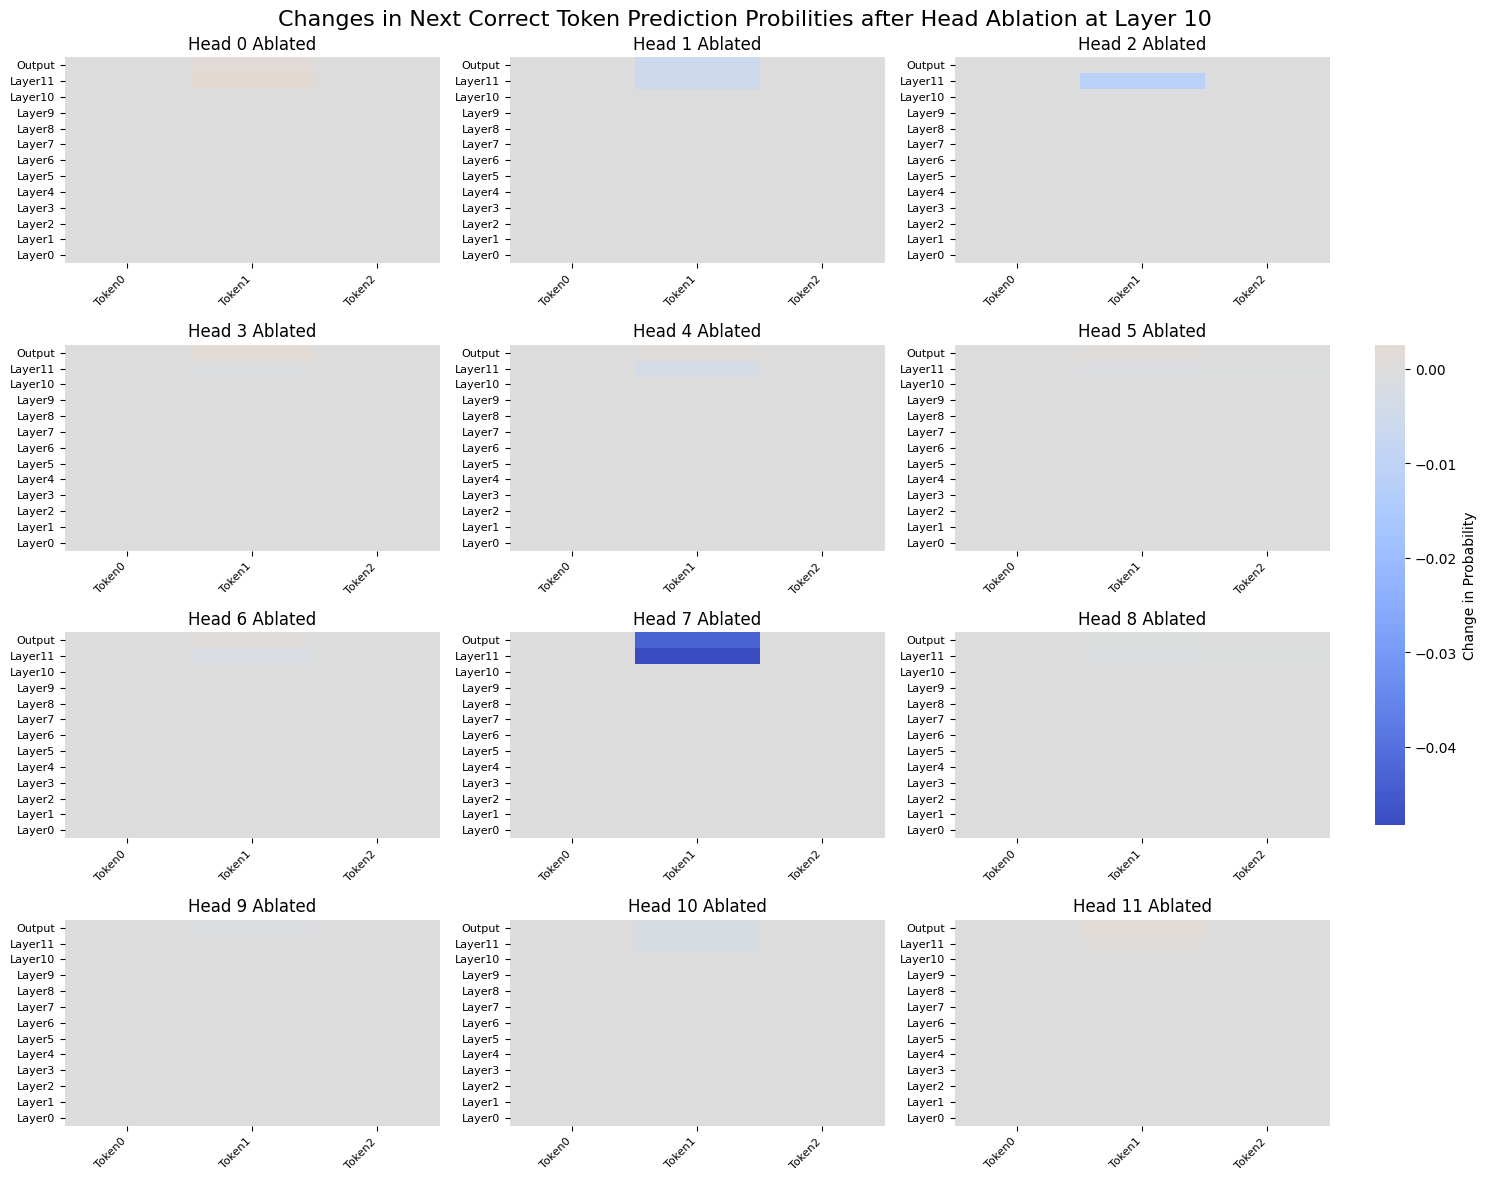

<ipython-input-23-c1531f011e6b>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
<ipython-input-23-c1531f011e6b>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


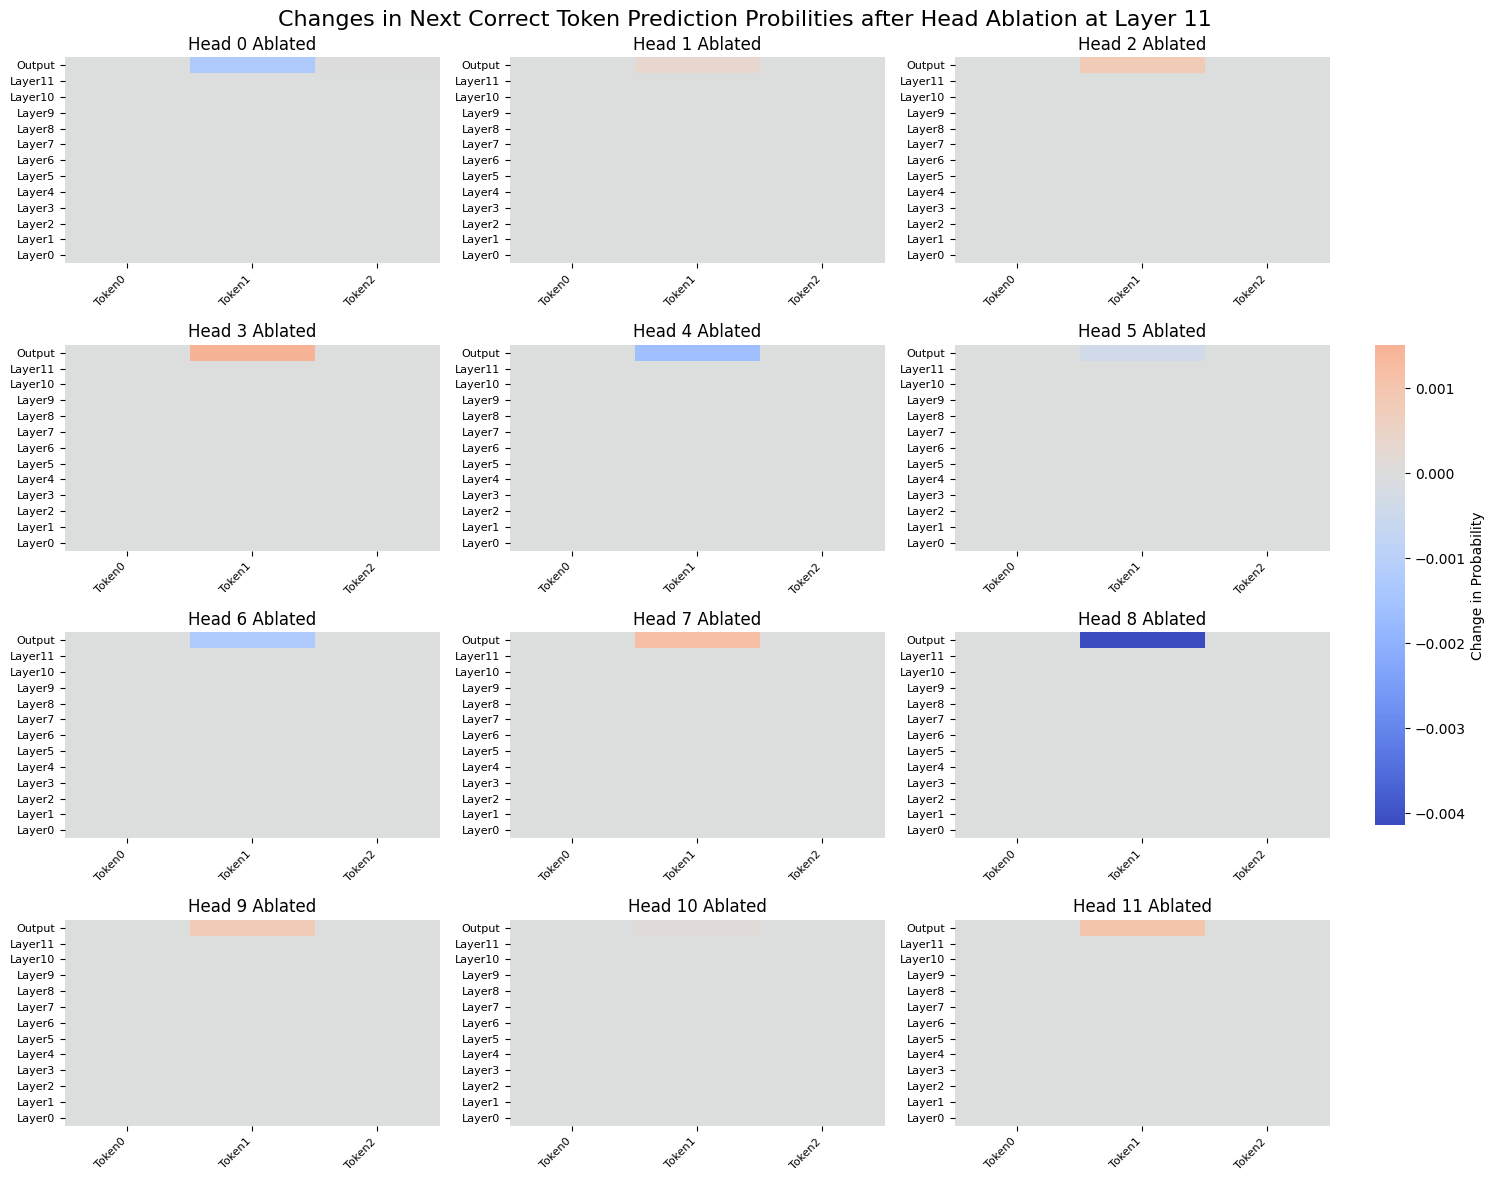

In [ ]:
# @title Plot Probability Changes (Each Graph Has a Different Scale)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import PowerNorm
# from matplotlib.colors import DivergingNorm
layer_to_ablated_probs = data
x_labels = [f"Token{i}" for i in range(3)]
y_labels = [f"Layer{i}" for i in range(12)] + ["Output"]

for i in range(12): # not 13
  fig, axes = plt.subplots(4, 3, figsize=(15, 12))
  fig.suptitle(f"Changes in Next Correct Token Prediction Probilities after Head Ablation at Layer {i}", fontsize=16)
  cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
  plt.tight_layout(rect=[0, 0, 1, 1])
  vmin = 100
  vmax = -100
  diff = []
  for j in range(12): # num of heads
    diff.append(np.array(layer_to_ablated_probs[str(i)][str(j)]) - np.array(layer_to_ablated_probs["no ablation"]))
    vmin = np.minimum(np.min(diff[j]), vmin)
    vmax = np.maximum(np.max(diff[j]), vmax)
    # print(vmin, vmax)


  for j in range(12): # num of heads
    plt_i, plt_j = j // 3, j % 3
    ax = axes[plt_i, plt_j]
    # sns.heatmap(diff[j], ax=ax, vmin=-0.35, vmax=0.1, cbar=(j == 0), cbar_ax=cbar_ax if j == 0 else None, cmap="coolwarm")
    # sns.heatmap(diff[j], ax=ax, cmap="coolwarm", norm=PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax), center=0, cbar=(j == 0), cbar_ax=cbar_ax if j == 0 else None)
    sns.heatmap(
    diff[j],
    ax=ax,
    cmap="coolwarm",
    vmin=vmin,
    vmax=vmax,
    center=0,          # ← this makes 0.0 map to the center color (white)
    cbar=(j == 0),
    cbar_ax=(cbar_ax if j == 0 else None),
    )

    # Add units to the colorbar
    if j == 0:
        cbar = ax.collections[0].colorbar
        cbar.set_label("Change in Probability")  # Set the colorbar label


    ax.set_title(f"Head {j} Ablated")
    ax.set_xticks(np.arange(len(x_labels)) + 0.5)
    ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=8)

    ax.set_yticks(np.arange(len(y_labels)) + 0.5)
    ax.set_yticklabels(y_labels, rotation=0, fontsize=8)
    ax.invert_yaxis()

  plt.tight_layout(rect=[0, 0, 0.9, 1])
  plt.show()

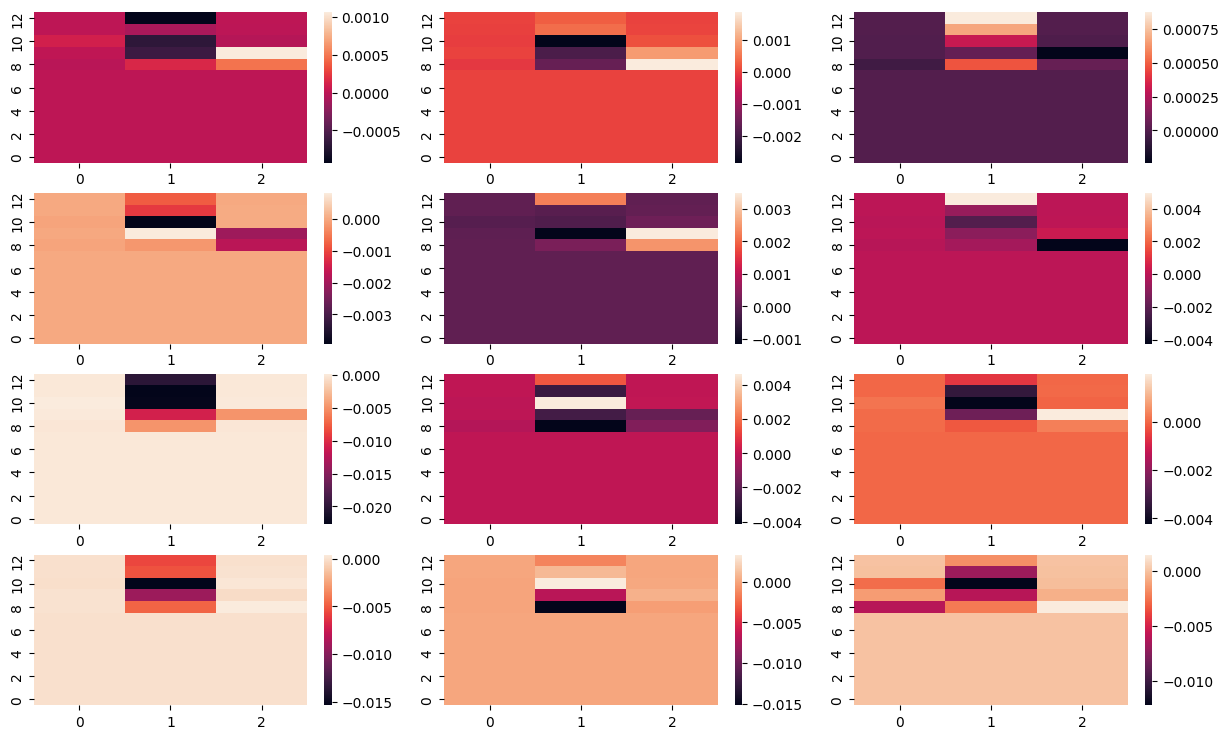

In [ ]:
# fig, axes = plt.subplots(4, 3, figsize=(15, 9))
# for i in range(n_head):
#   diff = ablated_prob[i] - avg_true_label_prob
#   plt_i, plt_j = i // 3, i % 3
#   ax = axes[plt_i, plt_j]
#   sns.heatmap(diff, ax=ax)
#   ax.invert_yaxis()

<ipython-input-58-29d407bb9bfe>:29: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



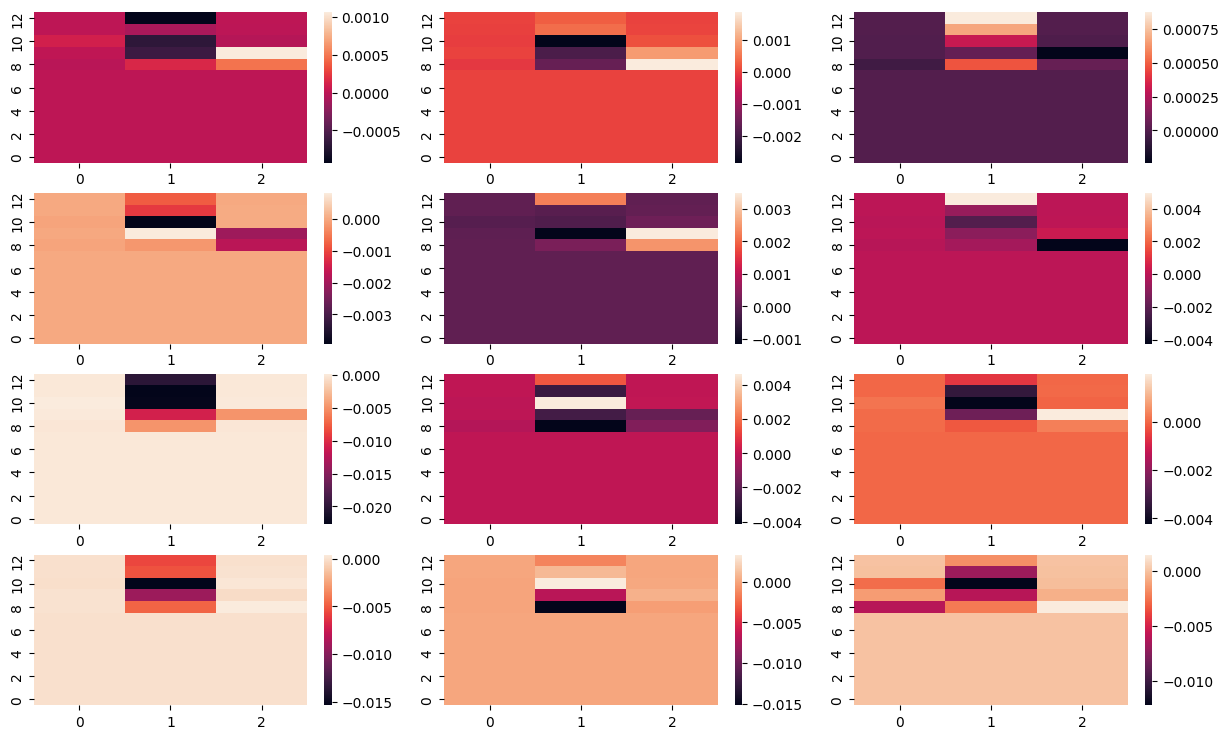

In [ ]:
# ablated_prob8 = calculate_ablated_prob(8)
# fig, axes = plt.subplots(4, 3, figsize=(15, 9))
# for i in range(n_head):
#   diff = ablated_prob8[i] - avg_true_label_prob
#   plt_i, plt_j = i // 3, i % 3
#   ax = axes[plt_i, plt_j]
#   sns.heatmap(diff, ax=ax)
#   ax.invert_yaxis()